## 1. Bibliotecas

In [182]:
# manipulação de dados
import pandas as pd

# gráficos
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# mexer com datas
from datetime import datetime

# versão de python
import sys

import numpy as np


In [3]:
# versão do python utilizada
print(sys.version)

3.9.12 (main, May  8 2022, 17:57:49) 
[Clang 13.1.6 (clang-1316.0.21.2)]


## 1.1 Objetivos
1. Faça uma **análise inicial dos dados**: você encontrou algum problema? Como você trataria estes problemas?

2. Faça uma **análise exploratória dos dados**: distribuições de variáveis, outliers, correlações, etc.
3. Faça uma **projeção do crescimento da carteira** para os próximos 2 anos em termos de **volume de operações** e da **carteira** utilizando os métodos de ciência de dados que julgar mais adequados para essa tarefa.

## 2. Base

In [49]:
# mostrar todas as colunas
pd.set_option('display.max_columns', None)

# carregando dados
dados = pd.read_csv('dados_operacoes 2.csv')

# primeiras 10 observações
dados.head(10)

,id,contrato,data_operacao,nascimento,idade,genero,bairro,cidade,estado,cep,telefone,cartao,email,ocupacao,empregador,operacao,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
0,682e8b505c30bb12052f9457516dc47e7eafc8ed,1760865030954,2019-09-13,1974-06-08,48,F,Conjunto Paulo Vi,Moreira,Rio de Janeiro,XXXXX-685,XXXXXXXXXXXXX2797,Null,XXXXa51@mXXXXXXXXXXXX,Espeleologista,e53d5342e82e0ce6061bc3aaea1a986f24a73613,Prod,27810.69,100,100,20,20,1.46493,531.56,53156.0000
1,45ad9d444a276407df8b6f47c0fcc5b127dadaaa,6023030871505,2022-11-03,1988-07-23,34,F,Minas Caixa,da Mota de Azevedo,Amapá,XXXXX735,Null,XXXXXXXXXX562960,XXXXXXXXXXXnda@tXXXXXXXXXXXX,Mágico,f715ffaf2c8294df43df3357c6a37f04b900fb06,Refin,9589.96,40,40,6,6,4.53587,523.82,20952.8000
2,81cec74ea2ca41535fee03daeb410ddbdf12906a,560263027614,2021-06-13,1975-08-17,Null,Null,Vila Mantiqueira,Rocha da Prata,Santa Catarina,XXXXX863,XXXXXXXXXXXXX1-3076,XXXXXXXXXX55,Null,Null,da9515ffa45dd12791be0941b91188e51fe1cc04,Prod,42963.20,100,100,10,10,1.44749,815.71,81571.0000
3,4e987d9178e2dcb07c2bf3878736233a676a0a87,1397061435926,2021-08-30,1982-08-17,40,F,Anchieta,da Mata,Null,Null,Null,Null,Null,Conferente de carga e descarga,0c1741dc26339e6af3e4b6badcf984d383d1ca44,Port + Refin,2954.14,120,120,6,6,1.82904,60.96,7315.1997
4,595943ecdb32a24ccb6ef374b6d865f3b60d7130,3823566005671,2022-11-16,1985-07-14,37,F,Conjunto Floramar,Moreira de Goiás,Mato Grosso,XXXXX384,XXXXXXXXXXXXX7089,Null,Null,Treinador,f97b240dc24290c19e717d7a654747aa31722ad3,Prod,31186.17,100,100,10,10,3.28340,1066.11,106611.0000
5,5e45a621fbb7998f7588091f8b7d480d3b24b2fc,5444678845030,2020-11-02,1984-05-29,38,M,Vila Fumec,Campos,Roraima,Null,XXXXXXXXXXXXX91 1070,XXXXXXXXXX12230,Null,Cirurgião bucal,Null,Port + Refin,41432.39,40,40,8,8,0.70787,1193.00,47720.0000
6,a31aba3a584cedd544a31cfe3af96a0dc06bad17,9023412229198,2019-11-22,1997-02-10,26,M,Null,Null,Pernambuco,XXXXX-022,XXXXXXXXXXXXX9-1921,XXXXXXXXXX13258,Null,Produtor de audio visual,25474923a0bac6ed841e0b776b035c73c444da1f,Prod,16870.66,60,60,9,9,1.13080,388.80,23328.0000
7,b0798e02f03eb1ad4ef5a8cbbc69e2732a7052d0,4167168660296,2021-12-08,1997-10-18,25,F,Vila Da Ária,Araújo,Alagoas,XXXXX007,XXXXXXXXXXXXX4284,Null,XXXXXXXXXXXXXara@aXXXXXXXXXXXX,Velejador,8e9e183c401487c93eb9c9127d15e0908208d252,Refin,2832.39,80,80,12,12,2.67154,86.12,6889.6000
8,1676c0f980840a4fb7d808fc831412e8cc0c1b29,7565583960651,2022-08-18,1984-06-17,38,M,Vila Tirol,Campos,Alagoas,XXXXX935,XXXXXXXXXXXXX42 5215,Null,XXXXXXXXlyn@pXXXXXXXXXXXX,Soldado,ecfeed45ad3c07bc0533b71937ff3fb0be094a12,Prod,22710.72,40,40,10,10,3.64272,1087.15,43486.0000
9,3411c0726cfae279d32d3a6a1d1c8a8fc560ffd5,7872966313608,2019-12-04,1999-11-17,23,M,Nossa Senhora Do Rosário,Fogaça,Ceará,XXXXX304,XXXXXXXXXXXXX48 3612,Null,XXXXXXXXcia@aXXXXXXXXXXXX,Null,8032e14ec79691c862249d17e0050d7da49913b9,Prod,18878.32,40,40,0,0,0.99986,574.94,22997.6000


Devido a confidencialidade dos dados, algumas colunas possuem informações censuradas substituindo valores ('telefone', 'cartao', 'email') ou com valores encurtados ('bairro', 'cidade')

## 3. Objetivo I: Análise Inicial dos Dados

In [31]:
# Entendendo colunas
# id - cada usuário único;
# contrato - cada contrato, valor único
# data_operacao - data de operação do contrato
# nascimento  - data de nascimento
# idade - idade, baseado na data de aquisição do contrato
# genero - gênero
# bairro - bairro de residencia
# cidade - cidade de residência
# estado - estado de residência
# cep - cep de residência
# telefone - telefone
# cartao - número do cartão
# email - email
# ocupação - profissão
# empregador
# operacao - tipo de operação 
# valor principal - valor emprestado mais os custos operacionais
# parcelas / quantidade_parcelas - número de parcelas totais 
# parcelas_pagas / quantidade_parcelas_pagas - número de parcelas pagas 
# taxa_contrato - taxa do contrato
# valor_parcela - valor da parcela
# valor_bruto - valor bruto, valor_parcela * parcelas

In [ ]:
# não é possível recuperar o CEP ou Telefone, devido a complexidade dos valores

In [69]:
# observando as dimensões da base (número de contratos, variáveis)
dados.shape

(14895, 28)

In [70]:
# tipo de cada coluna
dados.dtypes

id                                   object
contrato                              int64
data_operacao                datetime64[ns]
nascimento                   datetime64[ns]
idade                                object
genero                               object
bairro                               object
cidade                               object
estado                               object
cep                                  object
telefone                             object
cartao                               object
email                                object
ocupacao                             object
empregador                           object
operacao                             object
valor_principal                     float64
parcelas                              int64
quantidade_parcelas                   int64
parcelas_pagas                        int64
quantidade_parcelas_pagas             int64
taxa_contrato                       float64
valor_parcela                   

In [75]:
# muitas colunas apresentam o valor Null, porém, em formato string
# substituindo por valores None

dados_null = dados.replace('Null', None)

# quais colunas apresentam mais valores faltantes
dados_null.isnull().sum().sort_values(ascending = False)


cartao                       5279
email                        4667
telefone                     4655
cep                          3754
empregador                   3124
idade                        3005
cidade                       2831
bairro                       2539
ocupacao                     2271
estado                       2234
genero                       1487
parcelas_pagas                  0
mes                             0
ano_mes                         0
ano                             0
valor_bruto                     0
valor_parcela                   0
taxa_contrato                   0
quantidade_parcelas_pagas       0
id                              0
quantidade_parcelas             0
parcelas                        0
valor_principal                 0
operacao                        0
contrato                        0
nascimento                      0
data_operacao                   0
idade_atual                     0
dtype: int64

In [26]:
# analisando coluna em coluna
dados.sort_values('id')

# id representa o identificador único para o cliente, sendo repetido com mais de um mesmo contrato para o mesmo indivíduo

,id,contrato,data_operacao,nascimento,idade,genero,bairro,cidade,estado,cep,telefone,cartao,email,ocupacao,empregador,operacao,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
6324,000c6067c4dd520edbb54c7cdc9eac485b78c738,6310004122023,2019-11-01,1978-03-20,Null,F,Null,Correia Alegre,Minas Gerais,XXXXX-319,Null,XXXXXXXXXX96936,Null,Flanelinha,d1b3dbbe074341a0905b32ea8a5b34f1b7aadc4e,Prod,34954.85,40,40,10,10,1.14160,1093.42,43736.800
6325,000c6067c4dd520edbb54c7cdc9eac485b78c738,1082570440744,2021-06-25,1978-03-20,45,F,Santana Do Cafezal,Correia Alegre,Minas Gerais,Null,XXXXXXXXXXXXX92 0862,Null,XXXXXtas@rXXXXXXXXXXXX,Flanelinha,d1b3dbbe074341a0905b32ea8a5b34f1b7aadc4e,Prod,36003.96,60,60,3,3,0.98032,796.60,47796.000
6326,000c6067c4dd520edbb54c7cdc9eac485b78c738,8241000418187,2019-09-17,1978-03-20,45,F,Santana Do Cafezal,Correia Alegre,Null,XXXXX-319,XXXXXXXXXXXXX92 0862,XXXXXXXXXX96936,"XXXXXtas@bXXXXXXXXXX, @yXXXXXXXXXXXX",Flanelinha,d1b3dbbe074341a0905b32ea8a5b34f1b7aadc4e,Prod,19566.49,60,60,9,9,2.01257,564.60,33876.000
6327,000c6067c4dd520edbb54c7cdc9eac485b78c738,2823264694536,2021-03-26,1978-03-20,45,F,Santana Do Cafezal,Correia Alegre,Minas Gerais,XXXXX-319,XXXXXXXXXXXXX92 0862,Null,Null,Flanelinha,d1b3dbbe074341a0905b32ea8a5b34f1b7aadc4e,Refin,13167.24,60,60,42,42,0.57841,260.36,15621.600
145,000c6067c4dd520edbb54c7cdc9eac485b78c738,5219941735918,2019-05-01,1978-03-20,45,Null,Santana Do Cafezal,Null,Minas Gerais,XXXXX-319,Null,XXXXXXXXXX96936,XXXXXtas@gXXXXXXXX,Flanelinha,Null,Refin,18447.23,40,40,8,8,1.51216,618.01,24720.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6613,ffb691e4b8ee97640cc3916e27e15655e561f945,8922991162708,2019-04-22,1977-10-06,45,F,Null,Santos da Mata,Sergipe,XXXXX182,XXXXXXXXXXXXX 6154,XXXXXXXXXX776391,Null,Metalúrgico,95d070592fe1ce765b2b29df87251fdf16c45042,Prod,39898.86,80,80,20,20,1.50579,861.36,68908.800
4581,ffdea2575aaa61e522e74f4417e7a1262a4dcd38,4609638568041,2021-08-03,1983-03-29,39,F,Cinquentenário,Castro Alegre,Rondônia,XXXXX-003,XXXXXXXXXXXXX-4883,XXXXXXXXXX04674,XXXXtro@oXXXXXXXXXXX,Aeroviário,dfc3fd291dba46bb4292854ae201526c0b2edc51,Refin,5600.22,90,90,13,13,1.54270,115.52,10396.800
6971,ffdea2575aaa61e522e74f4417e7a1262a4dcd38,4813570766438,2020-08-18,1983-03-29,39,F,Cinquentenário,Castro Alegre,Rondônia,XXXXX-003,XXXXXXXXXXXXX-4883,XXXXXXXXXX04674,XXXXtro@gXXXXXXXX,Aeroviário,dfc3fd291dba46bb4292854ae201526c0b2edc51,Port + Refin,20705.47,90,90,9,9,0.60775,299.37,26943.299
6970,ffdea2575aaa61e522e74f4417e7a1262a4dcd38,8183192250339,2019-03-24,1983-03-29,Null,F,Cinquentenário,Castro Alegre,Rondônia,XXXXX-003,XXXXXXXXXXXXX-4883,XXXXXXXXXX04674,XXXXtro@gXXXXXXXX,Aeroviário,dfc3fd291dba46bb4292854ae201526c0b2edc51,Prod,32302.19,100,100,10,10,1.97834,743.94,74394.000


In [11]:
# como é possível ver no passo anterior que muitas vezes existe valores nulos em campos para o mesmo cliente
# isso partindo do pressuposto que não houve alterações nas informações do cliente (endereço, cartão, telefone, etc)

# é possível assim criar um depara com as informações únicas de cada um
base_depara = dados.groupby('id').agg('last').reset_index()
base_depara

,id,contrato,data_operacao,nascimento,idade,genero,bairro,cidade,estado,cep,telefone,cartao,email,ocupacao,empregador,operacao,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
0,000c6067c4dd520edbb54c7cdc9eac485b78c738,2823264694536,2021-03-26,1978-03-20,45,F,Santana Do Cafezal,Correia Alegre,Minas Gerais,XXXXX-319,XXXXXXXXXXXXX92 0862,Null,Null,Flanelinha,d1b3dbbe074341a0905b32ea8a5b34f1b7aadc4e,Refin,13167.24,60,60,42,42,0.57841,260.36,15621.600
1,000e8c3b9cb81b001237c73841b2ed680f409cb0,8779037725188,2021-02-25,1970-02-09,Null,Null,Vila São Dimas,Nunes de Minas,Pará,XXXXX039,XXXXXXXXXXXXX2965,XXXXXXXXXX69,XXXXXXXXXXXXXXXugo@mXXXXXXXXXXXX,Seguidor de compras,1041b151aaec2910d51a9d8789b501d4afb3ceb1,Prod,43676.72,90,90,9,9,0.87550,703.36,63302.400
2,0022514a2ecb2642e2def7e4f3a8192d415b25c8,7666075990436,2020-08-09,2001-01-05,22,F,Null,da Rosa,Acre,Null,XXXXXXXXXXXXX3 3808,XXXXXXXXXX410827,XXXXXXiro@mXXXXXXXXXXXX,Produtor de eventos,Null,Prod,27448.25,60,60,9,9,0.43731,521.10,31265.998
3,002a34ac68d3508d18a0b8f0e9b3a7d3ac29f485,9292568255836,2020-08-05,1978-12-20,44,M,Novo Santa Cecilia,Rezende,Distrito Federal,XXXXX986,XXXXXXXXXXXXX15 8980,XXXXXXXXXX17,Null,Null,a4eeeb4c585c9b3453d28f88568db799ef37cb7a,Prod,27207.66,120,120,24,24,0.71355,338.25,40590.000
4,002a92784ca4e66387fa029861a45f8eab23e195,1279392786611,2022-08-16,1979-02-25,44,Null,Mangabeiras,Azevedo do Amparo,Acre,XXXXX-997,XXXXXXXXXXXXX1 3647,XXXXXXXXXX032525,Null,Militar da Aeronáutica,7771a08de08ad43e36115be09a6906c42a885c48,Refin,7853.23,40,40,28,28,3.92691,392.47,15698.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,ff90f0db96dacc960bddb7d61e9d976b88f25301,1660584001443,2022-11-07,2000-05-19,Null,Null,Null,Null,Goiás,XXXXX028,XXXXXXXXXXXXX-4110,XXXXXXXXXX3408,Null,Null,b82f246013330bfeec4c414cd839f8612075b819,Prod,21637.76,40,40,4,4,3.28499,979.71,39188.402
4994,ffa01be374deb744d4c55a442ee5f19cfad5602f,3660271161908,2019-10-30,1995-05-10,27,F,Glória,Pires Alegre,Espírito Santo,Null,XXXXXXXXXXXXX8613,XXXXXXXXXX247,Null,Massagista,5510eb0185a59d005438068e8959a986a3c2a28a,Refin,7175.50,80,80,16,16,1.54797,157.02,12561.601
4995,ffb691e4b8ee97640cc3916e27e15655e561f945,8922991162708,2019-04-22,1977-10-06,45,F,Null,Santos da Mata,Sergipe,XXXXX182,XXXXXXXXXXXXX 6154,XXXXXXXXXX776391,Null,Metalúrgico,95d070592fe1ce765b2b29df87251fdf16c45042,Prod,39898.86,80,80,20,20,1.50579,861.36,68908.800
4996,ffdea2575aaa61e522e74f4417e7a1262a4dcd38,4813570766438,2020-08-18,1983-03-29,39,F,Cinquentenário,Castro Alegre,Rondônia,XXXXX-003,XXXXXXXXXXXXX-4883,XXXXXXXXXX04674,XXXXtro@gXXXXXXXX,Aeroviário,dfc3fd291dba46bb4292854ae201526c0b2edc51,Port + Refin,20705.47,90,90,9,9,0.60775,299.37,26943.299


In [14]:
# observando a quantidade de profissionais em cada vaga
base_depara.groupby('ocupacao').size().sort_values()

# boa parte possui valores null disponíveis, seja por problemas ao inserir a informação ou por ausência de profissão

ocupacao
Tecnólogo em produção de bebidas      1
Figurante                             1
Ceramista                             1
Epidemiólogo                          1
Luthier                               1
                                   ... 
Tapeceiro                            12
Psicomotricista                      13
Cientista                            14
Maestro                              14
Null                                786
Length: 747, dtype: int64

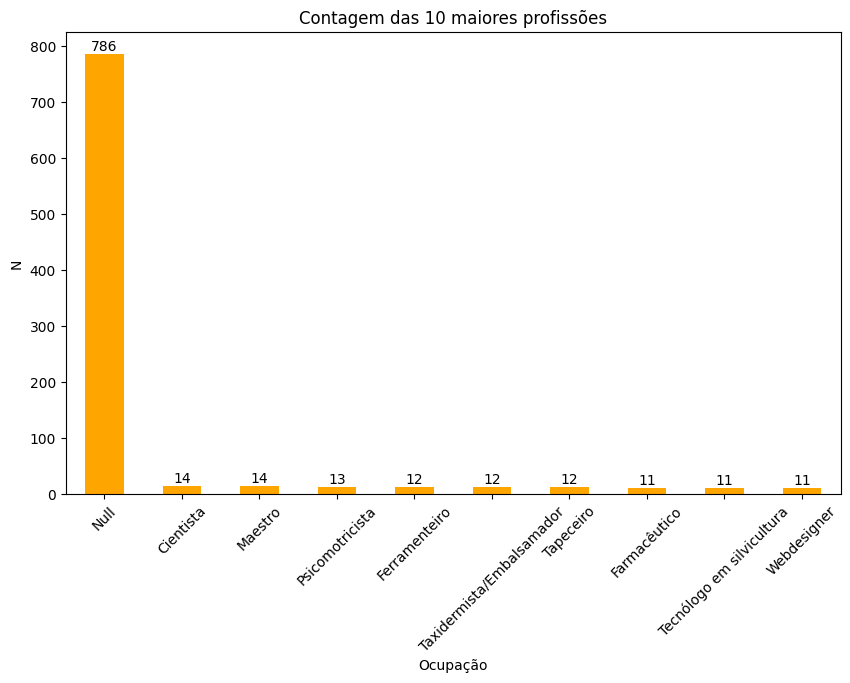

In [16]:
# observando a proporção das 10 profissões
ocupacao_dez = base_depara.groupby('ocupacao').size().sort_values().nlargest(10)


plt.figure(figsize=(10, 6))
ocupacao_dez.plot(kind='bar', color='orange')

# informações gráfico
plt.xlabel('Ocupação')
plt.ylabel('N')
plt.title('Contagem das 10 maiores profissões')
plt.xticks(rotation=45)

# adicionando valores
for i, v in enumerate(ocupacao_dez):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.show()

In [122]:
# muitos valores de estado estão faltando, portanto, checando se é possível inferir o estado pela cidade
dados.groupby(['cidade', 'estado']).size()

# é possível ver que não é seguro realizar a imputação de valores, pois Almeida, por exemplo, pode se referir a cidade de vários estados diferentes
# uma análise mais cuidadosa permitiria realizar a substituição dos valores para identificar o estado correto

cidade                  estado            
Almeida                 Acre                  6
                        Alagoas               2
                        Amapá                 2
                        Ceará                 1
                        Espírito Santo        3
                                             ..
das Neves do Galho      Rio Grande do Sul     4
das Neves do Norte      Rio de Janeiro        1
das Neves do Oeste      Mato Grosso do Sul    2
das Neves do Sul        Amapá                 1
das Neves dos Dourados  Roraima               1
Length: 4175, dtype: int64

In [111]:
# observando os tipos de operações possíveis
dados.operacao.unique()

# possuímos 3 valores únicos na base para operações:
# Prod (Producão) - criação de um novo contrato
# Refin (Refinanciamento) - refinanciar um contrato existe com condições melhores
# Port + Refin (Portabilidade + Refinanciamento - tranferência de contrato de instituição com refinanciamento

array(['Prod', 'Refin', 'Port + Refin'], dtype=object)

In [23]:
# observando a proporção de informações
op_n = dados.groupby('operacao').size()
op_porc = (op_n / op_n.sum()) * 100

pd.DataFrame({
    'count': op_n,
    'percentage': op_porc
}).sort_values('percentage', ascending=False)

# aproximadamente 60% das operações realizadas são de criação de contrato, seguido por 30% de refinanciamento e 10% de portabilidade com refinanciamento

,count,percentage
operacao,,
Prod,8925,59.919436
Refin,4431,29.748238
Port + Refin,1539,10.332326


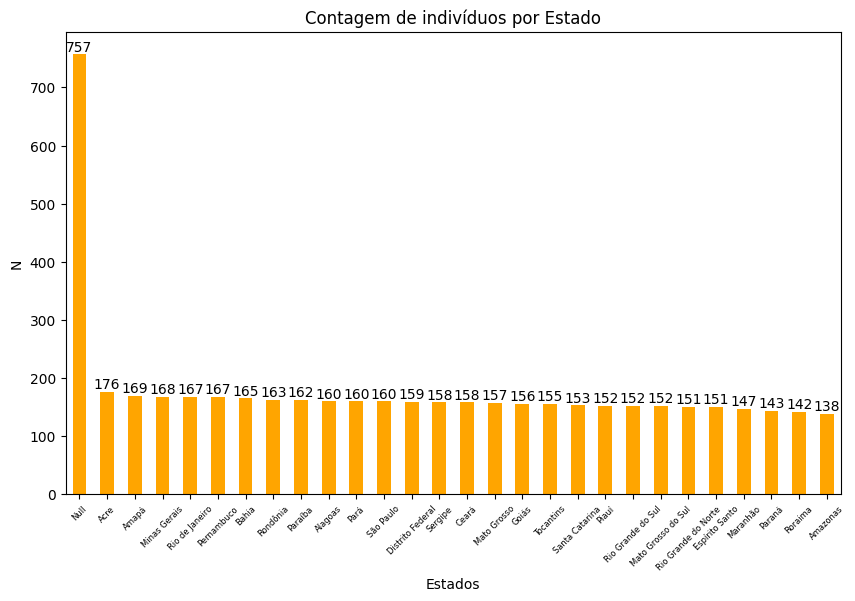

In [38]:
# quais são os maiores estados com contratos

estados = base_depara.groupby('estado').size().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
estados.plot(kind='bar', color='orange')

# informações gráfico
plt.xlabel('Estados')
plt.ylabel('N')
plt.title('Contagem de indivíduos por Estado')
plt.xticks(rotation=45, fontsize=6)

# adicionando valores
for i, v in enumerate(estados):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.show()

In [39]:
# como são apresentados vários estados diferentes, é possível classificar em estados de acordo com o nome apresentado
# criando uma coluna com a região da do estado
estados_regiao_dict = {
    'Acre': 'Norte',
    'Alagoas': 'Nordeste',
    'Amapá': 'Norte',
    'Amazonas': 'Norte',
    'Bahia': 'Nordeste',
    'Ceará': 'Nordeste',
    'Distrito Federal': 'Centro-Oeste',
    'Espírito Santo': 'Sudeste',
    'Goiás': 'Centro-Oeste',
    'Maranhão': 'Nordeste',
    'Mato Grosso': 'Centro-Oeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Minas Gerais': 'Sudeste',
    'Pará': 'Norte',
    'Paraíba': 'Nordeste',
    'Paraná': 'Sul',
    'Pernambuco': 'Nordeste',
    'Piauí': 'Nordeste',
    'Rio de Janeiro': 'Sudeste',
    'Rio Grande do Norte': 'Nordeste',
    'Rio Grande do Sul': 'Sul',
    'Rondônia': 'Norte',
    'Roraima': 'Norte',
    'Santa Catarina': 'Sul',
    'São Paulo': 'Sudeste',
    'Sergipe': 'Nordeste',
    'Tocantins': 'Norte'
}

# Create a DataFrame from the dictionary
estados_nomes = pd.DataFrame(list(estados_regiao_dict.items()), columns=['estado', 'regiao'])
estados_nomes

,estado,regiao
0,Acre,Norte
1,Alagoas,Nordeste
2,Amapá,Norte
3,Amazonas,Norte
4,Bahia,Nordeste
5,Ceará,Nordeste
6,Distrito Federal,Centro-Oeste
7,Espírito Santo,Sudeste
8,Goiás,Centro-Oeste
9,Maranhão,Nordeste


In [40]:
# juntando ambas as infornações
pd.merge(dados, estados_nomes, on='estado', how='left')

,id,contrato,data_operacao,nascimento,idade,genero,bairro,cidade,estado,cep,telefone,cartao,email,ocupacao,empregador,operacao,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto,regiao
0,682e8b505c30bb12052f9457516dc47e7eafc8ed,1760865030954,2019-09-13,1974-06-08,48,F,Conjunto Paulo Vi,Moreira,Rio de Janeiro,XXXXX-685,XXXXXXXXXXXXX2797,None,XXXXa51@mXXXXXXXXXXXX,Espeleologista,e53d5342e82e0ce6061bc3aaea1a986f24a73613,Prod,27810.69,100,100,20,20,1.46493,531.56,53156.0000,Sudeste
1,45ad9d444a276407df8b6f47c0fcc5b127dadaaa,6023030871505,2022-11-03,1988-07-23,34,F,Minas Caixa,da Mota de Azevedo,Amapá,XXXXX735,None,XXXXXXXXXX562960,XXXXXXXXXXXnda@tXXXXXXXXXXXX,Mágico,f715ffaf2c8294df43df3357c6a37f04b900fb06,Refin,9589.96,40,40,6,6,4.53587,523.82,20952.8000,Norte
2,81cec74ea2ca41535fee03daeb410ddbdf12906a,560263027614,2021-06-13,1975-08-17,None,None,Vila Mantiqueira,Rocha da Prata,Santa Catarina,XXXXX863,XXXXXXXXXXXXX1-3076,XXXXXXXXXX55,None,None,da9515ffa45dd12791be0941b91188e51fe1cc04,Prod,42963.20,100,100,10,10,1.44749,815.71,81571.0000,Sul
3,4e987d9178e2dcb07c2bf3878736233a676a0a87,1397061435926,2021-08-30,1982-08-17,40,F,Anchieta,da Mata,None,None,None,None,None,Conferente de carga e descarga,0c1741dc26339e6af3e4b6badcf984d383d1ca44,Port + Refin,2954.14,120,120,6,6,1.82904,60.96,7315.1997,NaN
4,595943ecdb32a24ccb6ef374b6d865f3b60d7130,3823566005671,2022-11-16,1985-07-14,37,F,Conjunto Floramar,Moreira de Goiás,Mato Grosso,XXXXX384,XXXXXXXXXXXXX7089,None,None,Treinador,f97b240dc24290c19e717d7a654747aa31722ad3,Prod,31186.17,100,100,10,10,3.28340,1066.11,106611.0000,Centro-Oeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14890,6ff33602a1b7e9ed89673aebec16898c2ee47d0d,5458053922742,2021-11-24,1994-08-19,28,M,Novo Das Industrias,Peixoto Grande,Espírito Santo,XXXXX-398,None,XXXXXXXXXX271242,XXXXXXXXXXXXXura@pXXXXXXXXXXXX,Fresador,f97b240dc24290c19e717d7a654747aa31722ad3,Prod,16879.13,60,60,54,54,2.80953,585.22,35113.2000,Sudeste
14891,6ff33602a1b7e9ed89673aebec16898c2ee47d0d,2484523401762,2022-09-14,1994-08-19,28,M,Novo Das Industrias,Peixoto Grande,Espírito Santo,None,XXXXXXXXXXXXX7786,None,XXXXXXXXXXXXXura@mXXXXXXXXXXXX,Fresador,f97b240dc24290c19e717d7a654747aa31722ad3,Refin,8223.88,40,40,4,4,3.21242,368.10,14724.0000,Sudeste
14892,6ff33602a1b7e9ed89673aebec16898c2ee47d0d,3816633880202,2022-12-04,1994-08-19,28,None,Novo Das Industrias,Peixoto Grande,Espírito Santo,XXXXX-398,XXXXXXXXXXXXX7786,None,XXXXXXXXXXXXXura@sXXXXXXXXXXXX,Fresador,f97b240dc24290c19e717d7a654747aa31722ad3,Refin,17501.20,40,40,2,2,4.49931,950.98,38039.2000,Sudeste
14893,766f27d3fb5072c1e14444ae8d9b143c029e08bb,1149747831092,2022-06-07,1984-01-10,39,F,None,da Mota,Rio Grande do Sul,None,None,None,XXXXXXXXXXhan@rXXXXXXXXXXXX,None,6e6a3d78d5828f20d3554943deddaad1d42d4666,Prod,14047.37,60,60,15,15,3.10678,519.24,31154.3980,Sul


In [55]:
# criando uma coluna com a diferença do valor bruto e o valor principal
dados['dif_valor'] = dados['valor_bruto'] - dados['valor_principal']
dados['dif_valor']

0        25345.3100
1        11362.8400
2        38607.8000
3         4361.0597
4        75424.8300
            ...    
14890    18234.0700
14891     6500.1200
14892    20538.0000
14893    17107.0280
14894     2213.6600
Name: dif_valor, Length: 14895, dtype: float64

In [54]:
# observando o período disponível na base e alterando as acolunas com a data da operação e data de nascimento para formato datetime
dados['data_operacao'] = pd.to_datetime(dados['data_operacao'])
dados['nascimento'] = pd.to_datetime(dados['nascimento'])

{"data mínima": dados['data_operacao'].min().strftime("%m/%d/%Y"), 
 "data máxima": dados['data_operacao'].max().strftime("%m/%d/%Y")}

# período de 4 anos disponível na base, de 2019 a 2022

{'data mínima': '01/01/2019', 'data máxima': '12/30/2022'}

/var/folders/g6/g5szk_zs6dbfy7cr596nd2n00000gn/T/ipykernel_1462/1609225366.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dados['data_operacao'].dt.week


0        37
1        44
2        23
3        35
4        46
         ..
14890    47
14891    37
14892    48
14893    23
14894    12
Name: data_operacao, Length: 14895, dtype: int64

In [85]:
# criando colunas com o ano, mês e semana
dados['ano'] = dados['data_operacao'].dt.year
dados['mes'] = dados['data_operacao'].dt.month
dados['semana'] = dados['data_operacao'].dt.isocalendar().week

# criando uma coluna com a informação de mês e ano
dados['ano_mes'] = dados['data_operacao'].apply(lambda x: x.replace(day = 1))

# como foi possível observar que alguns valores de idade estão faltando, é calculado os valores de idade novamente
dados['idade_atual'] = ((dados['data_operacao'] - dados['nascimento']) / pd.Timedelta(365, 'D')).round().astype('int')

In [ ]:
# observando a base nota-se que existem dois casos em que as colunas parecem ter os mesmos valores (parcelas e quantidade_parcelas, parcelas_pagas e quantidade_parcelas_pagas)
# conferindo se possuem os mesmos valores
dados[dados['parcelas'] != dados['quantidade_parcelas']]
dados[dados['parcelas_pagas'] != dados['quantidade_parcelas_pagas']]

# em ambos os casos, as colunas selecionadas possuem os mesmos valores, portanto, são redundantes

In [ ]:
# a partir de 2021 houve um aumento crescente de valores gerados, tendo um padrão de diinuição e aumento a partir de 2022

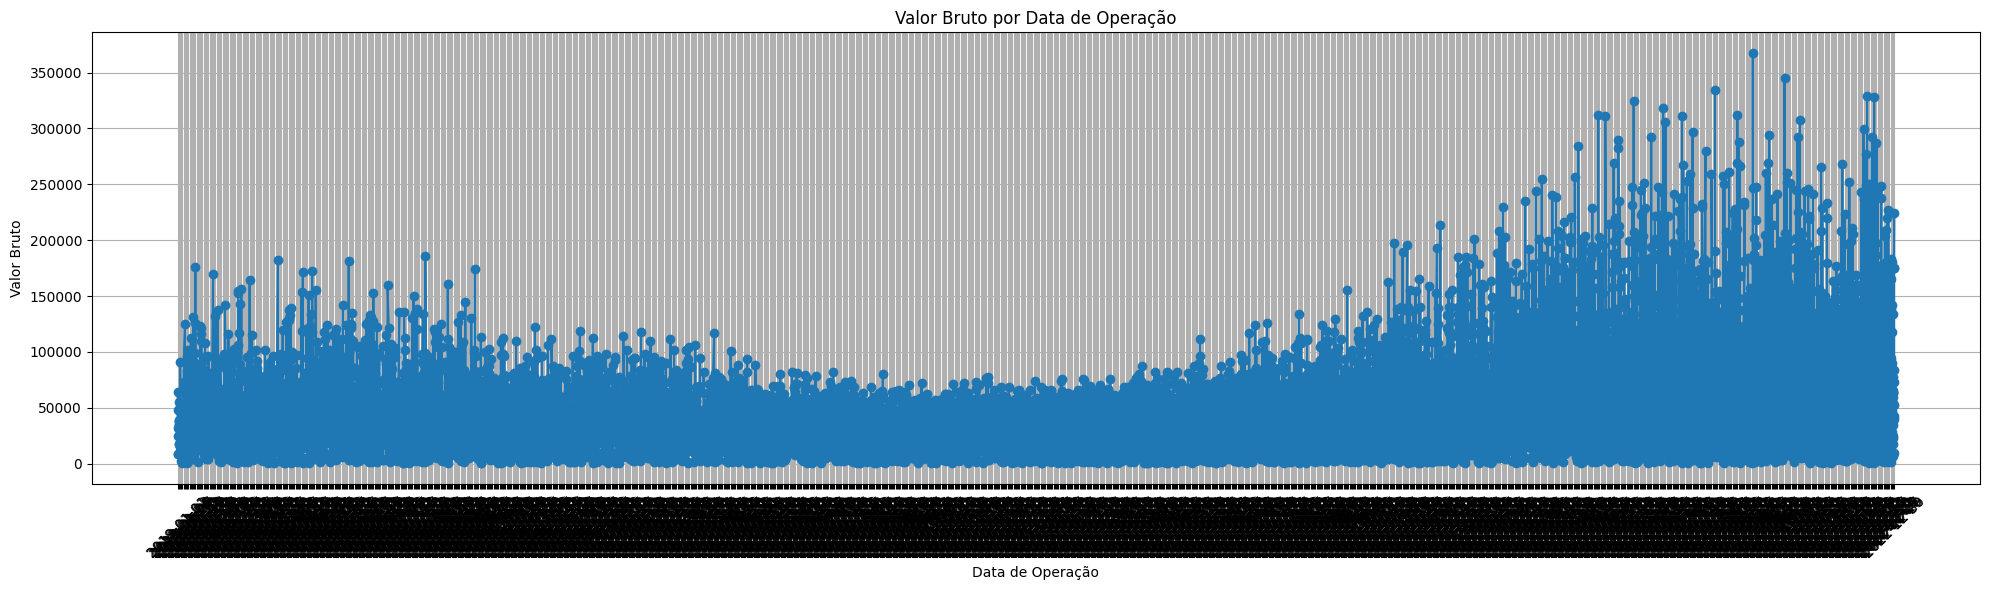

In [42]:
# visualizando os valores brutos de acordo com a data de operação
dadoss = dados.sort_values('data_operacao')


plt.figure(figsize=(20, 6))  # Optional: Set the figure size

plt.plot(dadoss['data_operacao'], dadoss['valor_bruto'], marker='o', linestyle='-')

# Customize the plot
plt.title('Valor Bruto por Data de Operação')  # Set the title
plt.xlabel('Data de Operação')  # Set the label for the x-axis
plt.ylabel('Valor Bruto')  # Set the label for the y-axis
plt.grid(True)  # Turn on the grid

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()  # Adjust layout
plt.show()

In [86]:
# como os dados por dia possuem alta variação, foi pego os valores agrupados por mês, com o número de contratos e o total

dados_agrupados_semana = dados.groupby(['ano', 'semana']).agg(
    {'id': 'nunique', 'valor_bruto': 'sum'}).reset_index()

# pegando os valores de soma e quantidade de contratos acumuladas
dados_agrupados_semana['soma_acum'] = dados_agrupados_semana.groupby('ano')['valor_bruto'].cumsum()
dados_agrupados_semana['id_acum'] = dados_agrupados_semana.groupby('ano')['id'].cumsum()

dados_agrupados_semana = dados_agrupados_semana.rename(columns={'id': 'soma_contratos', 'valor_bruto': 'soma_valor'})
dados_agrupados_semana

,ano,semana,soma_contratos,soma_valor,soma_acum,id_acum
0,2019,1,56,1.740551e+06,1.740551e+06,56
1,2019,2,49,2.387521e+06,4.128072e+06,105
2,2019,3,58,3.096816e+06,7.224889e+06,163
3,2019,4,77,3.313510e+06,1.053840e+07,240
4,2019,5,41,1.934515e+06,1.247291e+07,281
...,...,...,...,...,...,...
205,2022,48,91,6.392113e+06,2.961380e+08,4258
206,2022,49,85,7.015442e+06,3.031535e+08,4343
207,2022,50,82,7.157188e+06,3.103107e+08,4425
208,2022,51,107,7.923341e+06,3.182340e+08,4532


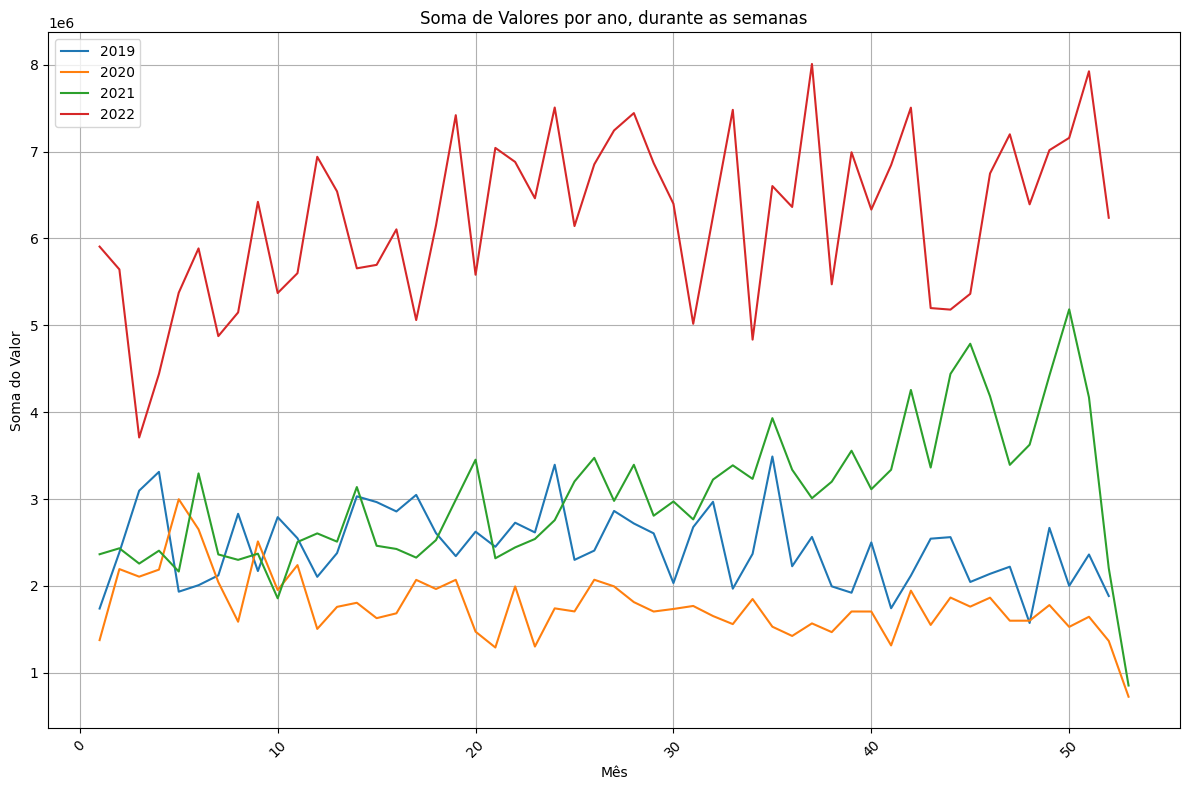

In [91]:
# observando a progressão dos valores gerados por semana
plt.figure(figsize=(12, 8))

for ano, group in dados_agrupados_semana.groupby('ano'):
    plt.plot(group['semana'], group['soma_valor'], label=ano)

plt.xlabel('Mês')
plt.ylabel('Soma do Valor')
plt.title('Soma de Valores por ano, durante as semanas')
plt.legend()


plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

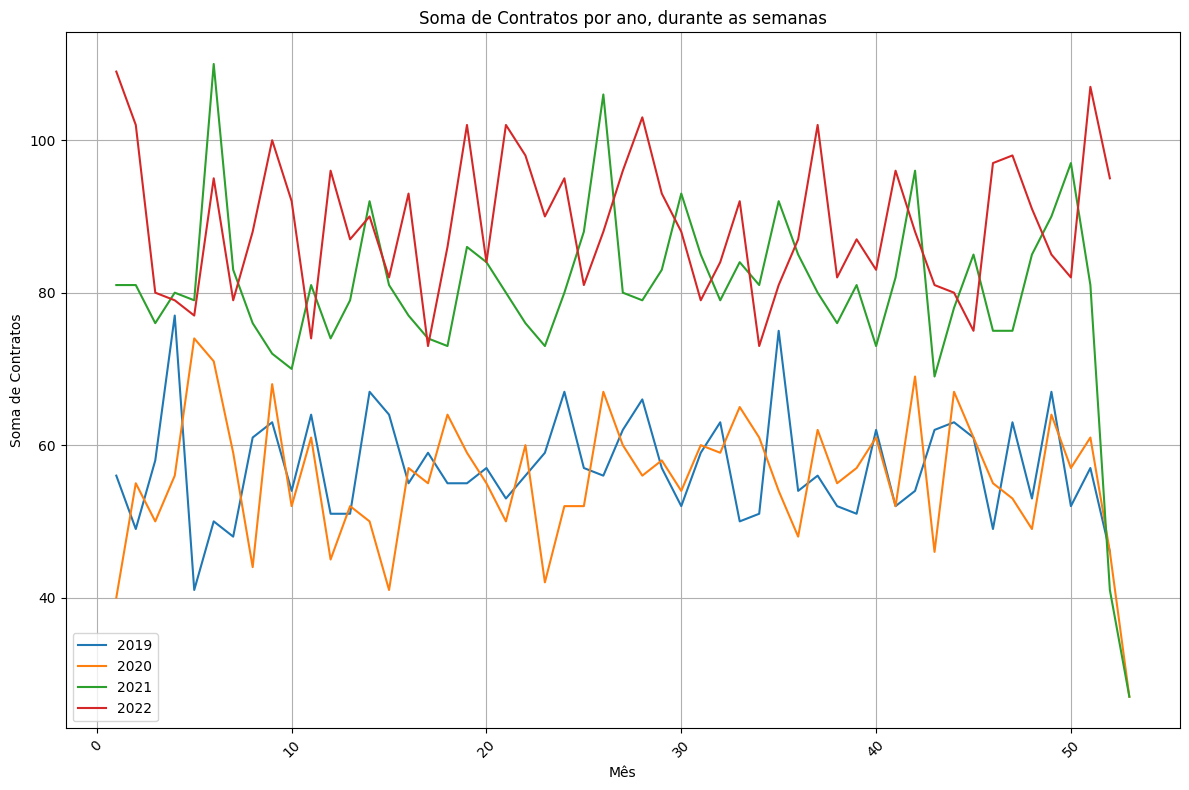

In [95]:
# observando a progressão dos contratos por semana
plt.figure(figsize=(12, 8))

for ano, group in dados_agrupados_semana.groupby('ano'):
    plt.plot(group['semana'], group['soma_contratos'], label=ano)

plt.xlabel('Mês')
plt.ylabel('Soma de Contratos')
plt.title('Soma de Contratos por ano, durante as semanas')
plt.legend()


plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

# a soma de contratos possui bastante dispersão entre 2021 e 2022, porém, apresentam perfil similar no número 

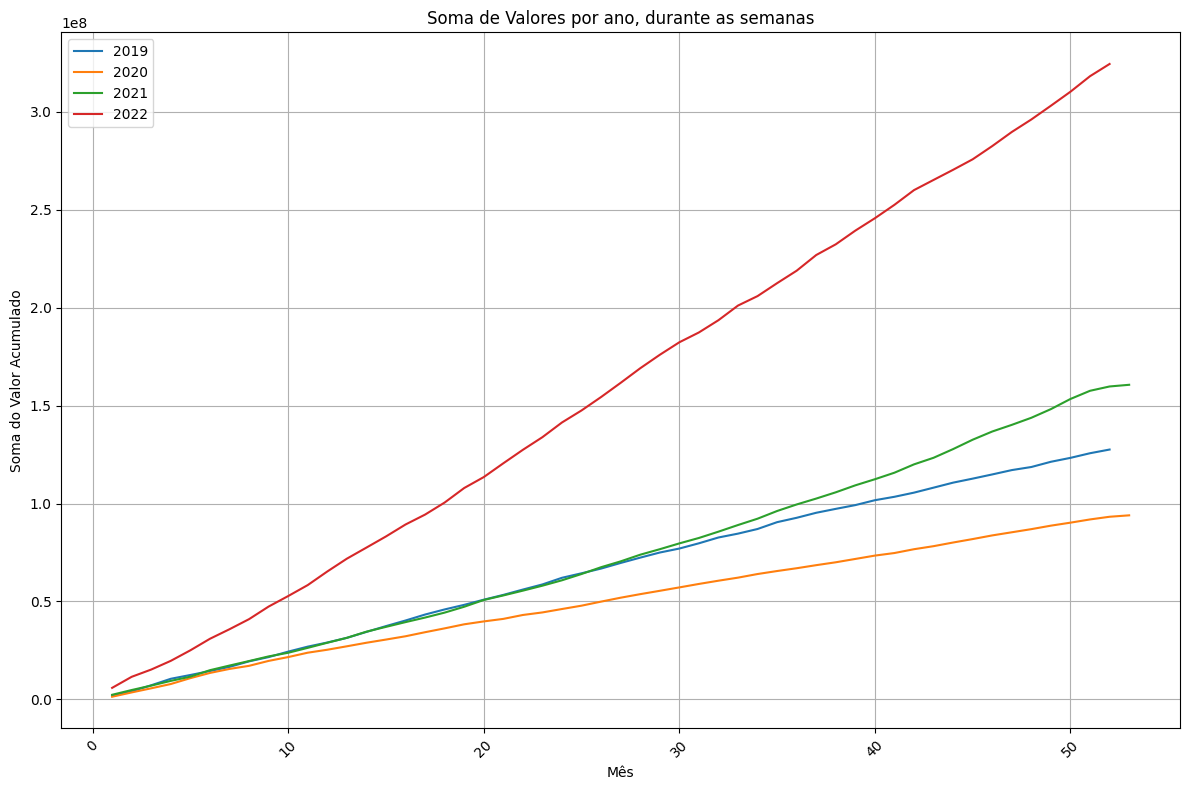

In [92]:
# observando a progressão dos valores gerados por semana
plt.figure(figsize=(12, 8))

for ano, group in dados_agrupados_semana.groupby('ano'):
    plt.plot(group['semana'], group['soma_acum'], label=ano)

plt.xlabel('Mês')
plt.ylabel('Soma do Valor Acumulado')
plt.title('Soma de Valores por ano, durante as semanas')
plt.legend()


plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

# a taxa de crescimento durante as semanas se mantem consistente durante o ano todo, assim, é possível usar os valores iniciais de cada ano para prever o total acumulado ao final dele

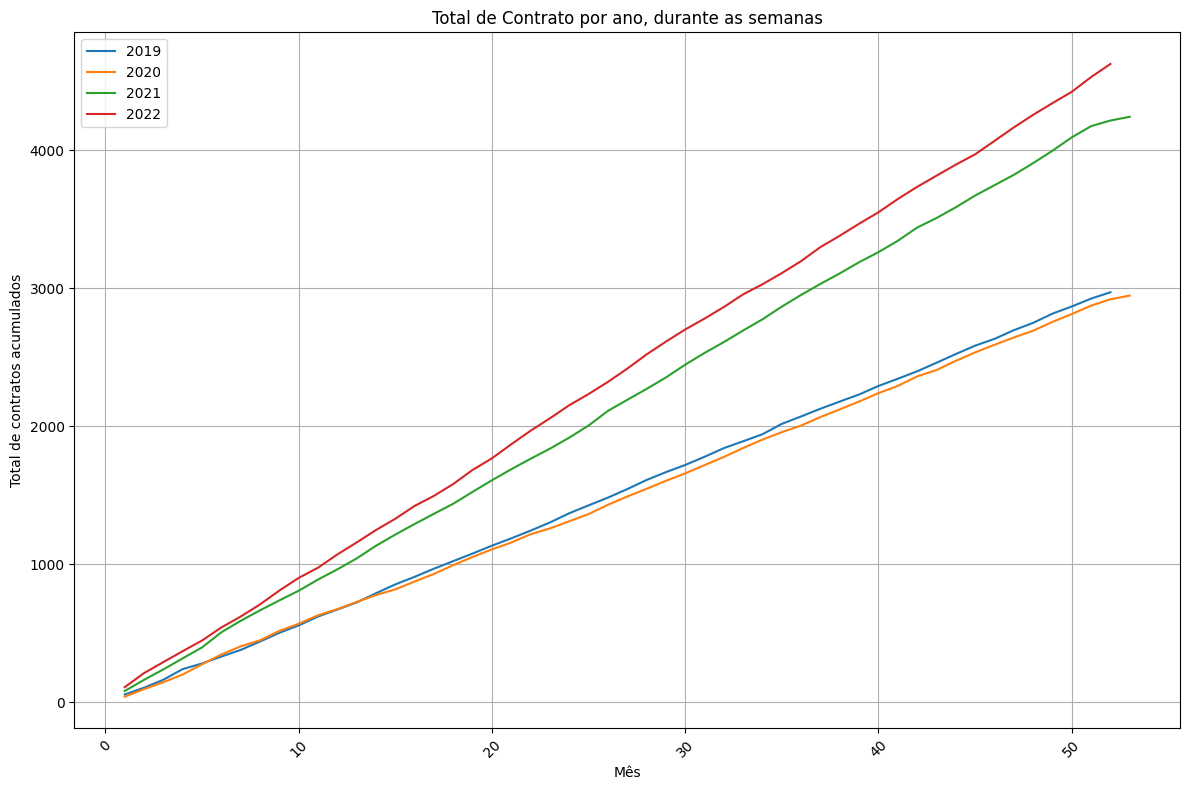

In [93]:
# observando a progressão dos valores gerados por semana
plt.figure(figsize=(12, 8))

for ano, group in dados_agrupados_semana.groupby('ano'):
    plt.plot(group['semana'], group['id_acum'], label=ano)

plt.xlabel('Mês')
plt.ylabel('Total de contratos acumulados')
plt.title('Total de Contratos por ano, durante as semanas')
plt.legend()


plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

# o mesmo ocorre para o total de contratos, porém, ao contrário do valor acumulado, o perfil de total de contratos de 2021 se assemelha bastante ao de 2022

In [63]:
# como os dados por dia possuem alta variação, foi pego os valores agrupados por mês, com o número de contratos e o total

dados_agrupados = dados.groupby(['ano', 'ano_mes']).agg(
    {'id': 'nunique', 'valor_bruto': 'sum'}).reset_index()

# pegando os valores de soma e quantidade de contratos acumuladas
dados_agrupados['soma_acum'] = dados_agrupados.groupby('ano')['valor_bruto'].cumsum()
dados_agrupados['id_acum'] = dados_agrupados.groupby('ano')['id'].cumsum()

dados_agrupados = dados_agrupados.rename(columns={'id': 'soma_contratos', 'valor_bruto': 'soma_valor'})
dados_agrupados

,ano,ano_mes,soma_contratos,soma_valor,soma_acum,id_acum
0,2019,2019-01-01,250,1.119969e+07,1.119969e+07,250
1,2019,2019-02-01,209,9.169594e+06,2.036928e+07,459
2,2019,2019-03-01,244,1.081287e+07,3.118215e+07,703
3,2019,2019-04-01,249,1.249654e+07,4.367870e+07,952
4,2019,2019-05-01,245,1.146736e+07,5.514605e+07,1197
5,2019,2019-06-01,252,1.141668e+07,6.656274e+07,1449
6,2019,2019-07-01,260,1.173831e+07,7.830105e+07,1709
7,2019,2019-08-01,251,1.143687e+07,8.973791e+07,1960
8,2019,2019-09-01,228,9.596552e+06,9.933447e+07,2188
9,2019,2019-10-01,249,9.966509e+06,1.093010e+08,2437


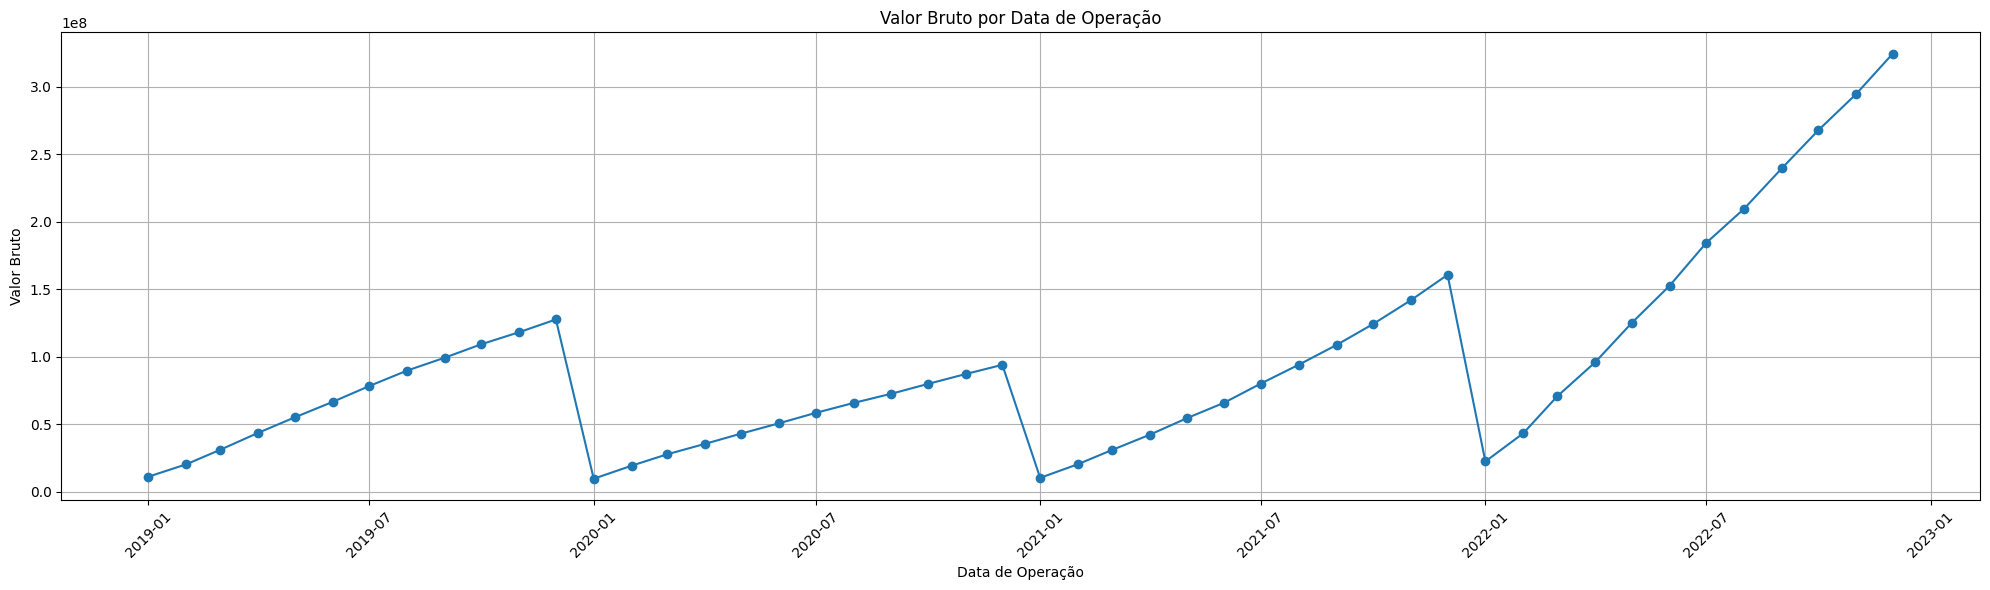

In [83]:
# observando a progressão dos valores acumulados 
plt.figure(figsize=(20, 6))

plt.plot(dados_agrupados['ano_mes'], dados_agrupados['soma_acum'], marker='o', linestyle='-')

plt.title('Valor Bruto Acumulado por Data de Operação')
plt.xlabel('Data de Operação')
plt.ylabel('Valor Bruto')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

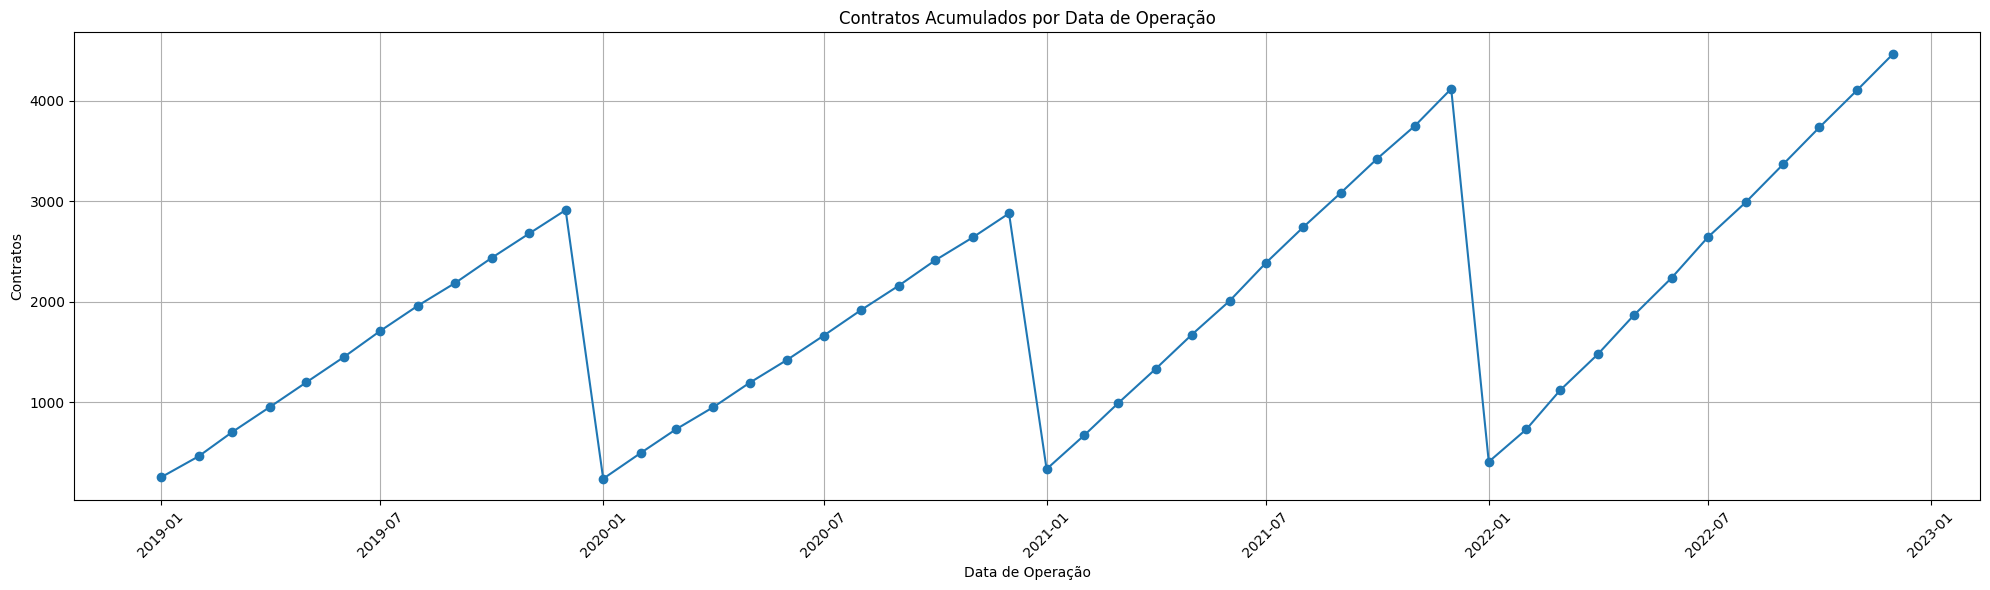

In [64]:
# progressão de contratos acumulados
plt.figure(figsize=(20, 6))

plt.plot(dados_agrupados['ano_mes'], dados_agrupados['id_acum'], marker='o', linestyle='-')

plt.title('Contratos Acumulados por Data de Operação')
plt.xlabel('Data de Operação')
plt.ylabel('Contratos')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# em ambos os casos, é possível observar que a progressão por ano segue um comportamento aproximadamente linear, se mantendo um padrão consistente durante todo o ano
# assim, observando os gráficos, seria possível realizar uma predição manualmente, apenas utilizando o valor total do ano anterior (determinante, principalmente, no valor acumulado)
# para determinar o valor inicial do ano seguinte, e a partir determinar uma predição para os meses seguintes

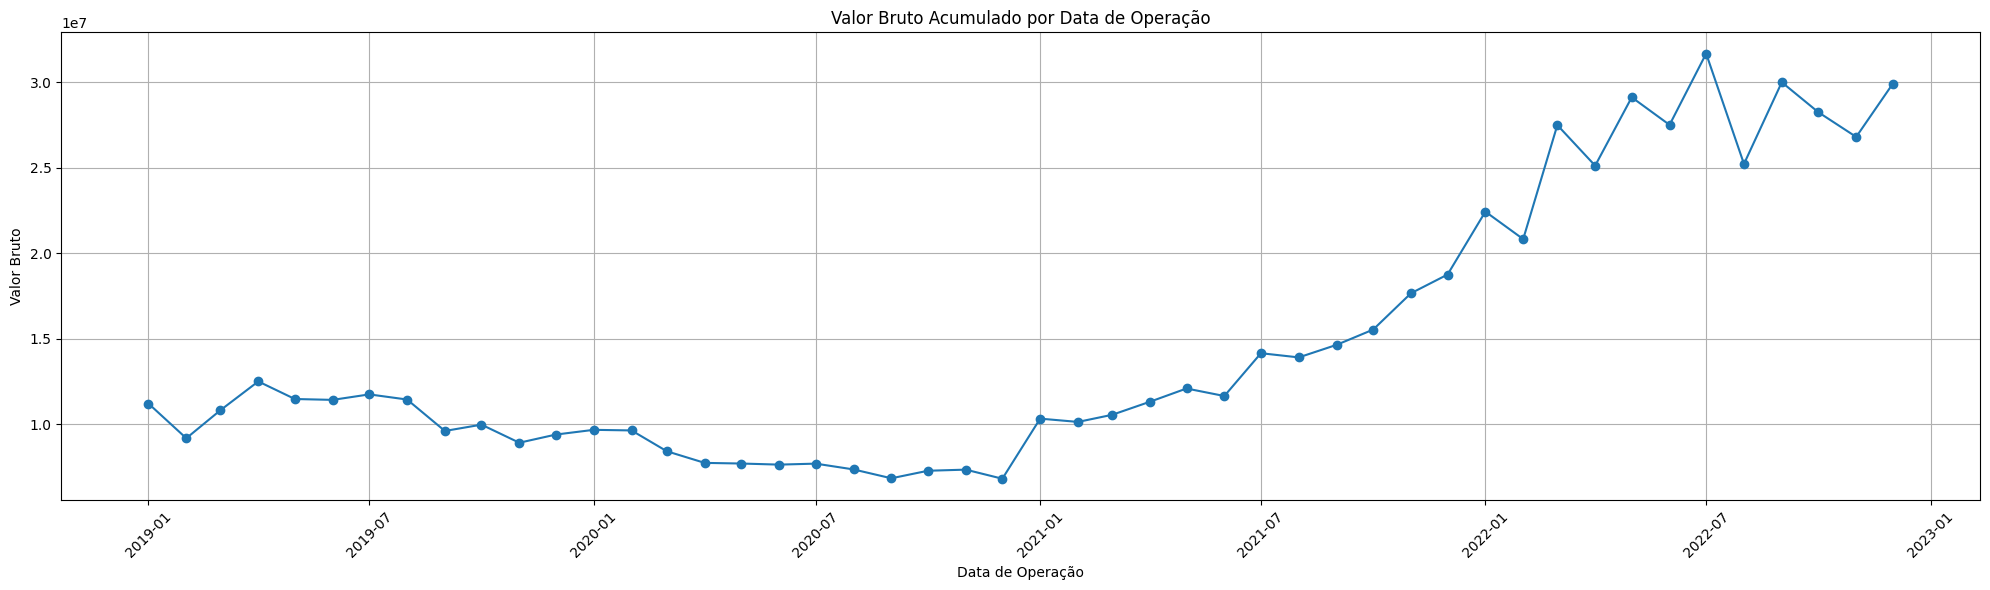

In [65]:
# observando a progressão dos valores por mês
plt.figure(figsize=(20, 6))

plt.plot(dados_agrupados['ano_mes'], dados_agrupados['soma_valor'], marker='o', linestyle='-')

plt.title('Soma do Valor Bruto por Data de Operação')
plt.xlabel('Data de Operação')
plt.ylabel('Soma do Valor Bruto')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

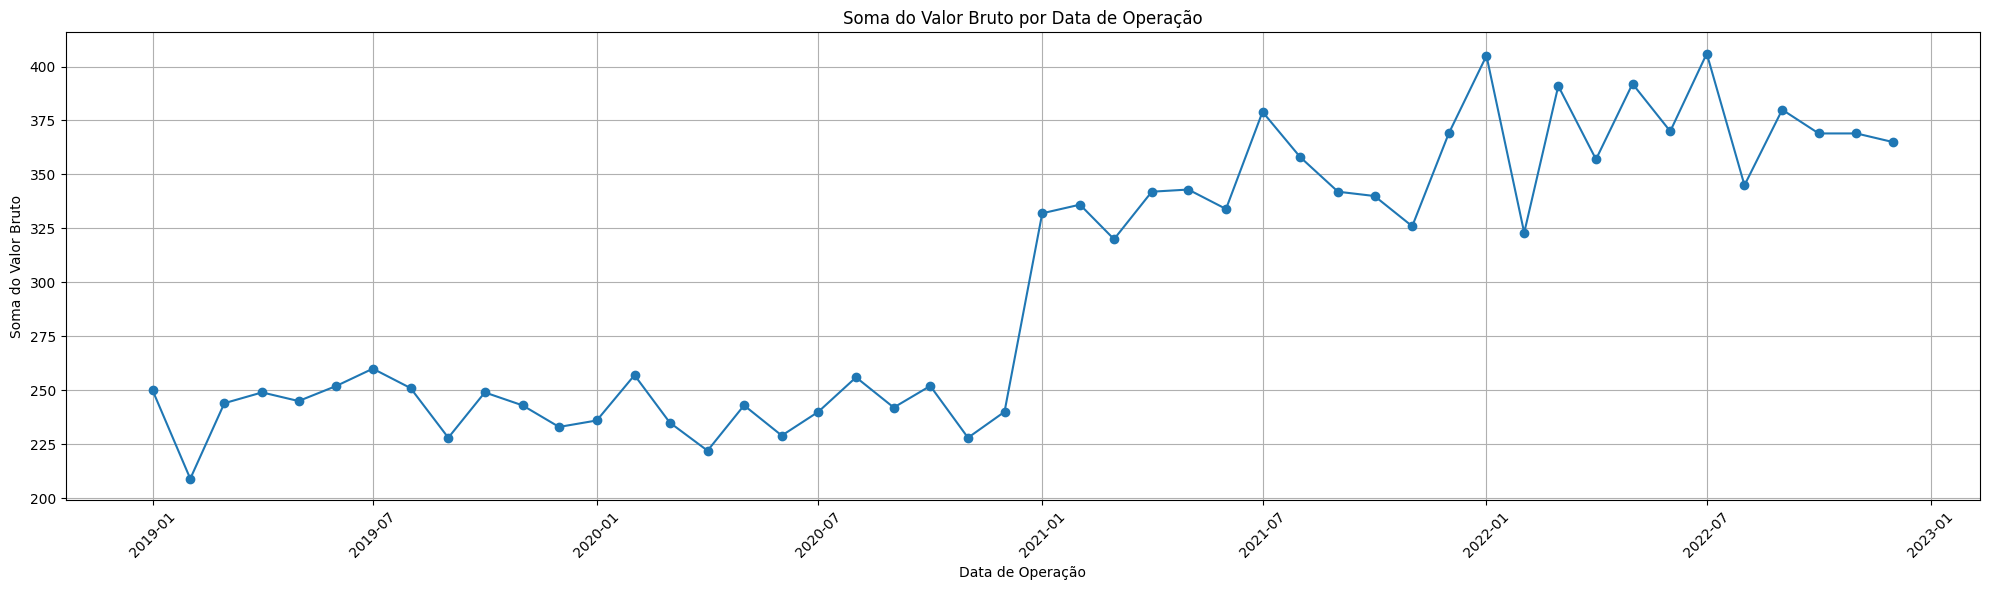

In [66]:
# observando a progressão dos valores por mês
plt.figure(figsize=(20, 6))

plt.plot(dados_agrupados['ano_mes'], dados_agrupados['soma_contratos'], marker='o', linestyle='-')

plt.title('Soma do Valor Bruto por Data de Operação')
plt.xlabel('Data de Operação')
plt.ylabel('Soma do Valor Bruto')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# é possível ver que houve um salto de de 2020 para 2021 no número de contratos

In [77]:
# conseguindo os dados agrupados por tipo de operação

dados_agrupados_op = dados.groupby(['ano', 'ano_mes', 'operacao']).agg(
    {'id': 'nunique', 'valor_bruto': 'sum'}).reset_index()

# pegando os valores de soma e quantidade de contratos acumuladas
dados_agrupados_op['soma_acum'] = dados_agrupados_op.groupby('ano')['valor_bruto'].cumsum()
dados_agrupados_op['id_acum'] = dados_agrupados_op.groupby('ano')['id'].cumsum()

dados_agrupados_op = dados_agrupados_op.rename(columns={'id': 'soma_contratos', 'valor_bruto': 'soma_valor'})
dados_agrupados_op

,ano,ano_mes,operacao,soma_contratos,soma_valor,soma_acum,id_acum
0,2019,2019-01-01,Port + Refin,34,1.382275e+06,1.382275e+06,34
1,2019,2019-01-01,Prod,149,8.345794e+06,9.728069e+06,183
2,2019,2019-01-01,Refin,69,1.471620e+06,1.119969e+07,252
3,2019,2019-02-01,Port + Refin,25,1.034903e+06,1.223459e+07,277
4,2019,2019-02-01,Prod,124,7.083400e+06,1.931799e+07,401
...,...,...,...,...,...,...,...
139,2022,2022-11-01,Prod,223,1.999406e+07,2.908932e+08,4082
140,2022,2022-11-01,Refin,110,3.653691e+06,2.945469e+08,4192
141,2022,2022-12-01,Port + Refin,42,2.704513e+06,2.972514e+08,4234
142,2022,2022-12-01,Prod,229,2.379665e+07,3.210481e+08,4463


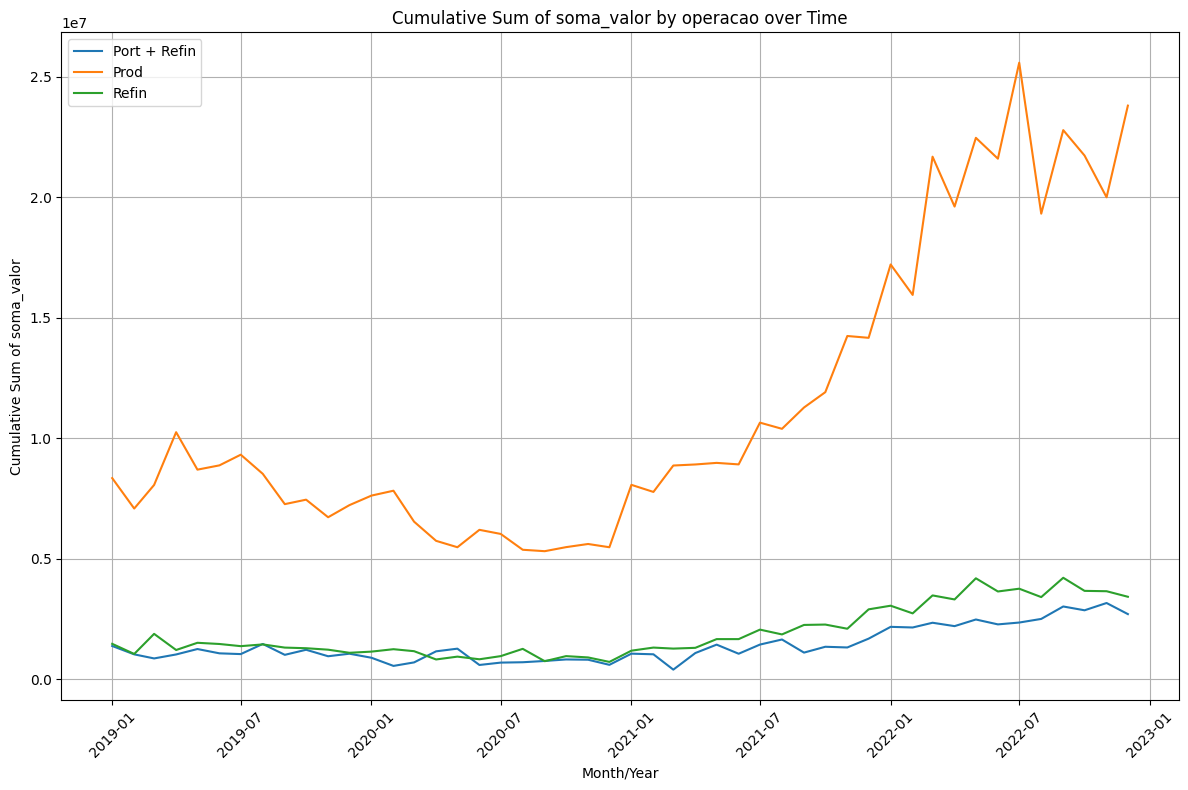

In [78]:
# observando a progressão dos valores gerados por tipo de contrato
plt.figure(figsize=(12, 8))

for operacao, group in dados_agrupados_op.groupby('operacao'):
    plt.plot(group['ano_mes'], group['soma_valor'], label=operacao)

plt.xlabel('Mês')
plt.ylabel('Soma do Valor')
plt.title('Soma de Valores por Operação, durante os meses')
plt.legend()


plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()


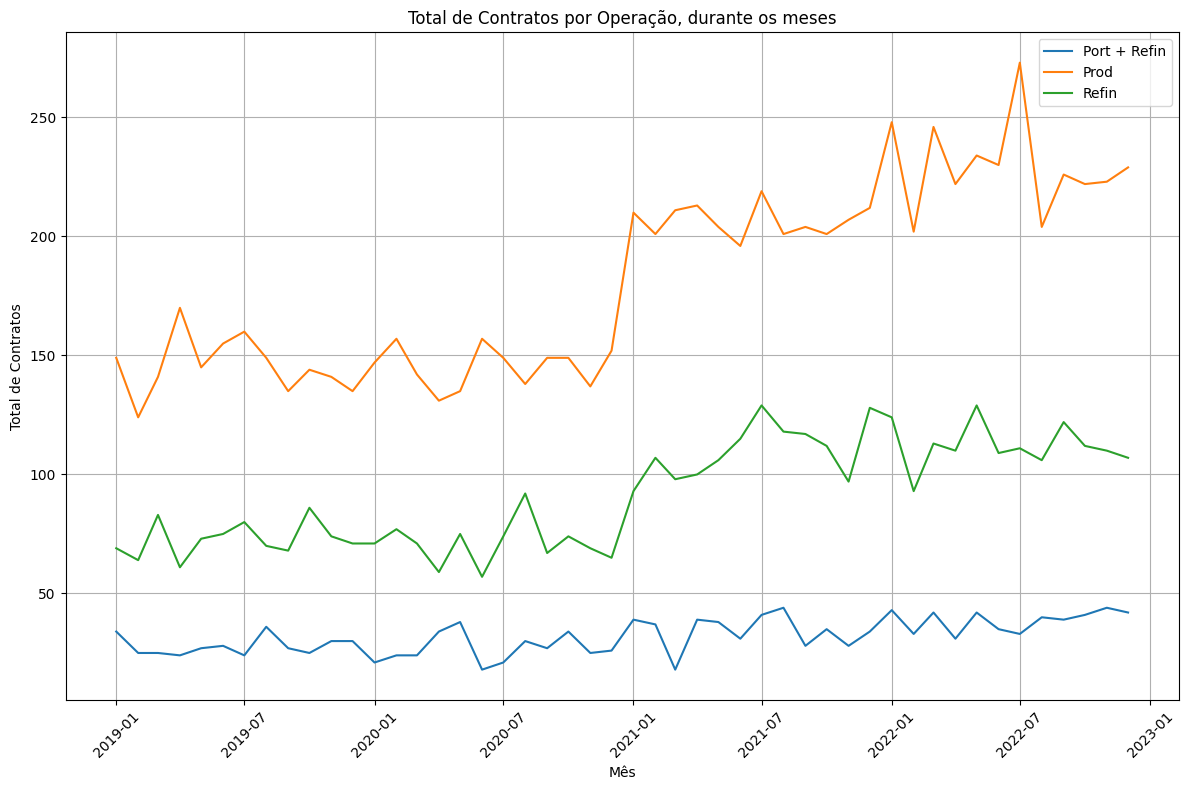

In [79]:
# observando a progressão de contratos
plt.figure(figsize=(12, 8))

for operacao, group in dados_agrupados_op.groupby('operacao'):
    plt.plot(group['ano_mes'], group['soma_contratos'], label=operacao)

plt.xlabel('Mês')
plt.ylabel('Total de Contratos')
plt.title('Total de Contratos por Operação, durante os meses')
plt.legend()


plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()


## Criando Variáveis 

In [97]:
dados.dtypes

id                                   object
contrato                              int64
data_operacao                datetime64[ns]
nascimento                   datetime64[ns]
idade                                object
genero                               object
bairro                               object
cidade                               object
estado                               object
cep                                  object
telefone                             object
cartao                               object
email                                object
ocupacao                             object
empregador                           object
operacao                             object
valor_principal                     float64
parcelas                              int64
quantidade_parcelas                   int64
parcelas_pagas                        int64
quantidade_parcelas_pagas             int64
taxa_contrato                       float64
valor_parcela                   

In [141]:
# adicionando colunas agregadas por ano e semana
grouped = dados.groupby(['ano', 'semana']).agg(agg_funcs)
grouped

grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]

# renomeando colunas
grouped = grouped.rename(columns={
    'valor_bruto_max': 'max_valor_bruto',
    'valor_bruto_min': 'min_valor_bruto',
    'valor_bruto_mean': 'media_valor_bruto',
    'valor_bruto_sum': 'soma_valor_bruto',
    'id_count': 'count_id',
    'id_<lambda_0>': 'unique_id_count' 
})

grouped


max_valor_bruto  min_valor_bruto  media_valor_bruto  \
ano  semana                                                        
2019 1              98336.00        461.00000       31081.267654   
     2             125356.50        615.60004       47750.426107   
     3             175849.20       1788.00000       52488.411763   
     4             121424.40       4185.60000       43032.593208   
     5             169731.61       7719.60000       47183.295244   
...                      ...              ...                ...   
2022 48            299709.62       2458.80000       68732.400843   
     49            328663.22        653.20000       81574.905953   
     50            328150.80        769.60000       85204.620404   
     51            248122.80       1382.40000       72691.202652   
     52            224486.02       1676.00000       65659.141248   

             soma_valor_bruto  count_id  unique_id_count  
ano  semana                                               
2019 1           1.740551e+06        56               56  
     2           2.387521e+06        50               49  
     3           3.096816e+06        59               58  
     4           3.313510e+06        77               77  
     5           1.934515e+06        41               41  
...                       ...       ...              ...  
2022 48          6.392113e+06        93               91  
     49          7.015442e+06        86               85  
     50          7.157188e+06        84               82  
     51          7.923341e+06       109              107  
     52          6.237618e+06        95               95  

[210 rows x 6 columns]

In [142]:

# agrupando por ano e semana
g = dados.groupby(['ano', 'semana'])

# colunas de soma por operação
sum_prod = pd.DataFrame(g.apply(lambda x: x[x['operacao'] == 'Prod']['valor_bruto'].sum())).rename(columns={0: 'soma_prod'})
sum_refin = pd.DataFrame(g.apply(lambda x: x[x['operacao'] == 'Refin']['valor_bruto'].sum())).rename(columns={0: 'soma_refin'})
sum_port_refin = pd.DataFrame(g.apply(lambda x: x[x['operacao'] == 'Port + Refin']['valor_bruto'].sum())).rename(columns={0: 'soma_port_refin'})

# max de cada operação
max_prod = pd.DataFrame(g.apply(lambda x: x[x['operacao'] == 'Prod']['valor_bruto'].max())).rename(columns={0: 'max_prod'})
max_refin = pd.DataFrame(g.apply(lambda x: x[x['operacao'] == 'Refin']['valor_bruto'].max())).rename(columns={0: 'max_refin'})
max_port_refin = pd.DataFrame(g.apply(lambda x: x[x['operacao'] == 'Port + Refin']['valor_bruto'].max())).rename(columns={0: 'max_port_refin'})

# min de cada operação
min_prod = pd.DataFrame(g.apply(lambda x: x[x['operacao'] == 'Prod']['valor_bruto'].min())).rename(columns={0: 'min_prod'})
min_refin = pd.DataFrame(g.apply(lambda x: x[x['operacao'] == 'Refin']['valor_bruto'].min())).rename(columns={0: 'min_refin'})
min_port_refin = pd.DataFrame(g.apply(lambda x: x[x['operacao'] == 'Port + Refin']['valor_bruto'].min())).rename(columns={0: 'min_port_refin'})

# adicionando colunas a base
dataframes = [sum_prod, sum_refin, sum_port_refin,
              max_prod, max_refin, max_port_refin,
              min_prod, min_refin, min_port_refin]

merged_dataframes = []
grouped_final = grouped
for df in dataframes:
    grouped_final = pd.merge(grouped_final, df, on=['ano', 'semana'], how='inner')

# base agrupada
grouped_final

max_valor_bruto  min_valor_bruto  media_valor_bruto  \
ano  semana                                                        
2019 1              98336.00        461.00000       31081.267654   
     2             125356.50        615.60004       47750.426107   
     3             175849.20       1788.00000       52488.411763   
     4             121424.40       4185.60000       43032.593208   
     5             169731.61       7719.60000       47183.295244   
...                      ...              ...                ...   
2022 48            299709.62       2458.80000       68732.400843   
     49            328663.22        653.20000       81574.905953   
     50            328150.80        769.60000       85204.620404   
     51            248122.80       1382.40000       72691.202652   
     52            224486.02       1676.00000       65659.141248   

             soma_valor_bruto  count_id  unique_id_count    soma_prod  \
ano  semana                                                             
2019 1           1.740551e+06        56               56  1235685.092   
     2           2.387521e+06        50               49  1889076.109   
     3           3.096816e+06        59               58  2380437.600   
     4           3.313510e+06        77               77  2310373.991   
     5           1.934515e+06        41               41  1564108.005   
...                       ...       ...              ...          ...   
2022 48          6.392113e+06        93               91  5051701.473   
     49          7.015442e+06        86               85  6088372.507   
     50          7.157188e+06        84               82  5126543.768   
     51          7.923341e+06       109              107  6108952.582   
     52          6.237618e+06        95               95  5265852.615   

               soma_refin  soma_port_refin   max_prod   max_refin  \
ano  semana                                                         
2019 1       2.797033e+05     2.251626e+05   98336.00   38536.000   
     2       3.135604e+05     1.848848e+05  125356.50   45585.600   
     3       2.502739e+05     4.661048e+05  175849.20   60199.200   
     4       5.522579e+05     4.508778e+05  121424.40   58848.000   
     5       1.482715e+05     2.221356e+05  169731.61   39483.900   
...                   ...              ...        ...         ...   
2022 48      7.331790e+05     6.072328e+05  299709.62  111415.200   
     49      4.851270e+05     4.419424e+05  328663.22   62652.797   
     50      9.873835e+05     1.043261e+06  328150.80  143660.400   
     51      1.211818e+06     6.025710e+05  237527.00  108172.000   
     52      7.184704e+05     2.532954e+05  224486.02   90081.000   

             max_port_refin   min_prod   min_refin  min_port_refin  
ano  semana                                                         
2019 1            44481.598  14277.601   461.00000        2853.000  
     2            88690.000  22884.000   615.60004        2936.000  
     3            90658.800  16598.000  9018.40000        1788.000  
     4            96298.195  14996.000  4185.60000        6879.000  
     5            57915.000  17159.201  7719.60000       13276.400  
...                     ...        ...         ...             ...  
2022 48          144296.000  21333.602  2458.80000        6573.000  
     49          103980.000  24662.000   653.20000        9502.400  
     50          187496.110  23699.200   769.60000       22211.600  
     51          248122.800  23922.800  2691.20000        1382.400  
     52           83388.000  21765.000  1676.00000       14776.801  

[210 rows x 15 columns]

In [143]:
grouped_final.columns

Index(['max_valor_bruto', 'min_valor_bruto', 'media_valor_bruto',
       'soma_valor_bruto', 'count_id', 'unique_id_count', 'soma_prod',
       'soma_refin', 'soma_port_refin', 'max_prod', 'max_refin',
       'max_port_refin', 'min_prod', 'min_refin', 'min_port_refin'],
      dtype='object')

In [172]:
# criando colunas adicionais 

# valores passados em 1, 2, 3 e 4
shift_1 = grouped_final.apply(lambda x: x.shift(1)).rename(columns=lambda col: col + '_shift_1')
shift_2 = grouped_final.apply(lambda x: x.shift(1)).rename(columns=lambda col: col + '_shift_2')
shift_3 = grouped_final.apply(lambda x: x.shift(1)).rename(columns=lambda col: col + '_shift_3')
shift_4 = grouped_final.apply(lambda x: x.shift(1)).rename(columns=lambda col: col + '_shift_4')

# calculando métrica (média) para uma janela
rolling = grouped_final.apply(lambda x: x.rolling(window=7).mean()).rename(columns=lambda col: col + '_rolling_window')

# janela fixa
expanding = grouped_final.apply(lambda x: x.expanding(2).mean()).rename(columns=lambda col: col + '_expanding')

# código para pegar a primeira diferenciação de cada coluna (taxa de mudança)
def calculate_diff_and_drop_na(series):
    return series.diff().dropna()
diff = grouped_final.apply(lambda column: calculate_diff_and_drop_na(column)).rename(columns=lambda col: col + '_diff')

# tabelas para juntar as colunas
dataframes = [shift_1, shift_2, shift_3, shift_4, rolling, expanding, diff]

# adicionando todas juntas
merged_dataframes = []
base_final = grouped_final
for df in dataframes:
    base_final = pd.merge(base_final, df, on=['ano', 'semana'], how='inner')



In [173]:
# base com colunas criadas
base_final

max_valor_bruto  min_valor_bruto  media_valor_bruto  \
ano  semana                                                        
2019 2             125356.50        615.60004       47750.426107   
     3             175849.20       1788.00000       52488.411763   
     4             121424.40       4185.60000       43032.593208   
     5             169731.61       7719.60000       47183.295244   
     6             142370.00       1266.40000       40181.240094   
...                      ...              ...                ...   
2022 48            299709.62       2458.80000       68732.400843   
     49            328663.22        653.20000       81574.905953   
     50            328150.80        769.60000       85204.620404   
     51            248122.80       1382.40000       72691.202652   
     52            224486.02       1676.00000       65659.141248   

             soma_valor_bruto  count_id  unique_id_count    soma_prod  \
ano  semana                                                             
2019 2           2.387521e+06        50               49  1889076.109   
     3           3.096816e+06        59               58  2380437.600   
     4           3.313510e+06        77               77  2310373.991   
     5           1.934515e+06        41               41  1564108.005   
     6           2.009062e+06        50               50  1496897.809   
...                       ...       ...              ...          ...   
2022 48          6.392113e+06        93               91  5051701.473   
     49          7.015442e+06        86               85  6088372.507   
     50          7.157188e+06        84               82  5126543.768   
     51          7.923341e+06       109              107  6108952.582   
     52          6.237618e+06        95               95  5265852.615   

               soma_refin  soma_port_refin   max_prod   max_refin  \
ano  semana                                                         
2019 2       3.135604e+05     1.848848e+05  125356.50   45585.600   
     3       2.502739e+05     4.661048e+05  175849.20   60199.200   
     4       5.522579e+05     4.508778e+05  121424.40   58848.000   
     5       1.482715e+05     2.221356e+05  169731.61   39483.900   
     6       3.072566e+05     2.049076e+05  142370.00   44661.598   
...                   ...              ...        ...         ...   
2022 48      7.331790e+05     6.072328e+05  299709.62  111415.200   
     49      4.851270e+05     4.419424e+05  328663.22   62652.797   
     50      9.873835e+05     1.043261e+06  328150.80  143660.400   
     51      1.211818e+06     6.025710e+05  237527.00  108172.000   
     52      7.184704e+05     2.532954e+05  224486.02   90081.000   

             max_port_refin   min_prod   min_refin  min_port_refin  \
ano  semana                                                          
2019 2            88690.000  22884.000   615.60004       2936.0000   
     3            90658.800  16598.000  9018.40000       1788.0000   
     4            96298.195  14996.000  4185.60000       6879.0000   
     5            57915.000  17159.201  7719.60000      13276.4000   
     6            91314.000  14995.601  1266.40000       2323.2002   
...                     ...        ...         ...             ...   
2022 48          144296.000  21333.602  2458.80000       6573.0000   
     49          103980.000  24662.000   653.20000       9502.4000   
     50          187496.110  23699.200   769.60000      22211.6000   
     51          248122.800  23922.800  2691.20000       1382.4000   
     52           83388.000  21765.000  1676.00000      14776.8010   

             max_valor_bruto_shift_1  min_valor_bruto_shift_1  \
ano  semana                                                     
2019 2                      98336.00                461.00000   
     3                     125356.50                615.60004   
     4                     175849.20               1788.00000   
     5                     121424.40        

In [174]:
# correlação entre as variáveis
corr = base_final.corr()
corr

,max_valor_bruto,min_valor_bruto,media_valor_bruto,soma_valor_bruto,count_id,unique_id_count,soma_prod,soma_refin,soma_port_refin,max_prod,max_refin,max_port_refin,min_prod,min_refin,min_port_refin,max_valor_bruto_shift_1,min_valor_bruto_shift_1,media_valor_bruto_shift_1,soma_valor_bruto_shift_1,count_id_shift_1,unique_id_count_shift_1,soma_prod_shift_1,soma_refin_shift_1,soma_port_refin_shift_1,max_prod_shift_1,max_refin_shift_1,max_port_refin_shift_1,min_prod_shift_1,min_refin_shift_1,min_port_refin_shift_1,max_valor_bruto_shift_2,min_valor_bruto_shift_2,media_valor_bruto_shift_2,soma_valor_bruto_shift_2,count_id_shift_2,unique_id_count_shift_2,soma_prod_shift_2,soma_refin_shift_2,soma_port_refin_shift_2,max_prod_shift_2,max_refin_shift_2,max_port_refin_shift_2,min_prod_shift_2,min_refin_shift_2,min_port_refin_shift_2,max_valor_bruto_shift_3,min_valor_bruto_shift_3,media_valor_bruto_shift_3,soma_valor_bruto_shift_3,count_id_shift_3,unique_id_count_shift_3,soma_prod_shift_3,soma_refin_shift_3,soma_port_refin_shift_3,max_prod_shift_3,max_refin_shift_3,max_port_refin_shift_3,min_prod_shift_3,min_refin_shift_3,min_port_refin_shift_3,max_valor_bruto_shift_4,min_valor_bruto_shift_4,media_valor_bruto_shift_4,soma_valor_bruto_shift_4,count_id_shift_4,unique_id_count_shift_4,soma_prod_shift_4,soma_refin_shift_4,soma_port_refin_shift_4,max_prod_shift_4,max_refin_shift_4,max_port_refin_shift_4,min_prod_shift_4,min_refin_shift_4,min_port_refin_shift_4,max_valor_bruto_rolling_window,min_valor_bruto_rolling_window,media_valor_bruto_rolling_window,soma_valor_bruto_rolling_window,count_id_rolling_window,unique_id_count_rolling_window,soma_prod_rolling_window,soma_refin_rolling_window,soma_port_refin_rolling_window,max_prod_rolling_window,max_refin_rolling_window,max_port_refin_rolling_window,min_prod_rolling_window,min_refin_rolling_window,min_port_refin_rolling_window,max_valor_bruto_expanding,min_valor_bruto_expanding,media_valor_bruto_expanding,soma_valor_bruto_expanding,count_id_expanding,unique_id_count_expanding,soma_prod_expanding,soma_refin_expanding,soma_port_refin_expanding,max_prod_expanding,max_refin_expanding,max_port_refin_expanding,min_prod_expanding,min_refin_expanding,min_port_refin_expanding,max_valor_bruto_diff,min_valor_bruto_diff,media_valor_bruto_diff,soma_valor_bruto_diff,count_id_diff,unique_id_count_diff,soma_prod_diff,soma_refin_diff,soma_port_refin_diff,max_prod_diff,max_refin_diff,max_port_refin_diff,min_prod_diff,min_refin_diff,min_port_refin_diff
max_valor_bruto,1.000000,0.083964,0.948666,0.910320,0.572411,0.570673,0.902522,0.832192,0.673209,0.999447,0.890640,0.795602,0.661675,0.085405,0.167075,0.869183,0.137737,0.895682,0.866909,0.552502,0.548827,0.854886,0.798949,0.671929,0.867046,0.845398,0.780662,0.617225,0.121451,0.103052,0.869183,0.137737,0.895682,0.866909,0.552502,0.548827,0.854886,0.798949,0.671929,0.867046,0.845398,0.780662,0.617225,0.121451,0.103052,0.869183,0.137737,0.895682,0.866909,0.552502,0.548827,0.854886,0.798949,0.671929,0.867046,0.845398,0.780662,0.617225,0.121451,0.103052,0.869183,0.137737,0.895682,0.866909,0.552502,0.548827,0.854886,0.798949,0.671929,0.867046,0.845398,0.780662,0.617225,0.121451,0.103052,0.946443,0.271085,0.940442,0.926830,0.675781,0.675509,0.926616,0.913633,0.877675,0.946430,0.924938,0.919948,0.851008,0.240433,0.367833,0.396775,-0.227552,0.315540,0.837319,0.836631,0.832208,0.839608,0.847004,0.716067,0.398388,0.414843,0.531318,0.036612,-0.241150,0.075113,0.258886,-0.039189,0.138361,0.105721,0.028094,0.030613,0.103231,0.047850,0.001108,0.257426,0.080172,0.019893,0.047295,-0.026275,0.047770
min_valor_bruto,0.083964,1.000000,0.111858,0.045045,-0.096380,-0.092931,0.031435,0.083167,0.072773,0.082588,0.072959,0.117147,0.041544,0.911310,0.190068,0.081312,0.052309,0.094134,0.039342,-0.061921,-0.058702,0.042565,0.016048,0.029940,0.083902,0.039973,0.049673,0.156378,0.065010,0.139684,0.081312,0.052309,0.094134,0.039342,-0.061921,-0.058702,0.042565,0.016048,0.029940,0.083902,0.039973,0.

<Axes: >

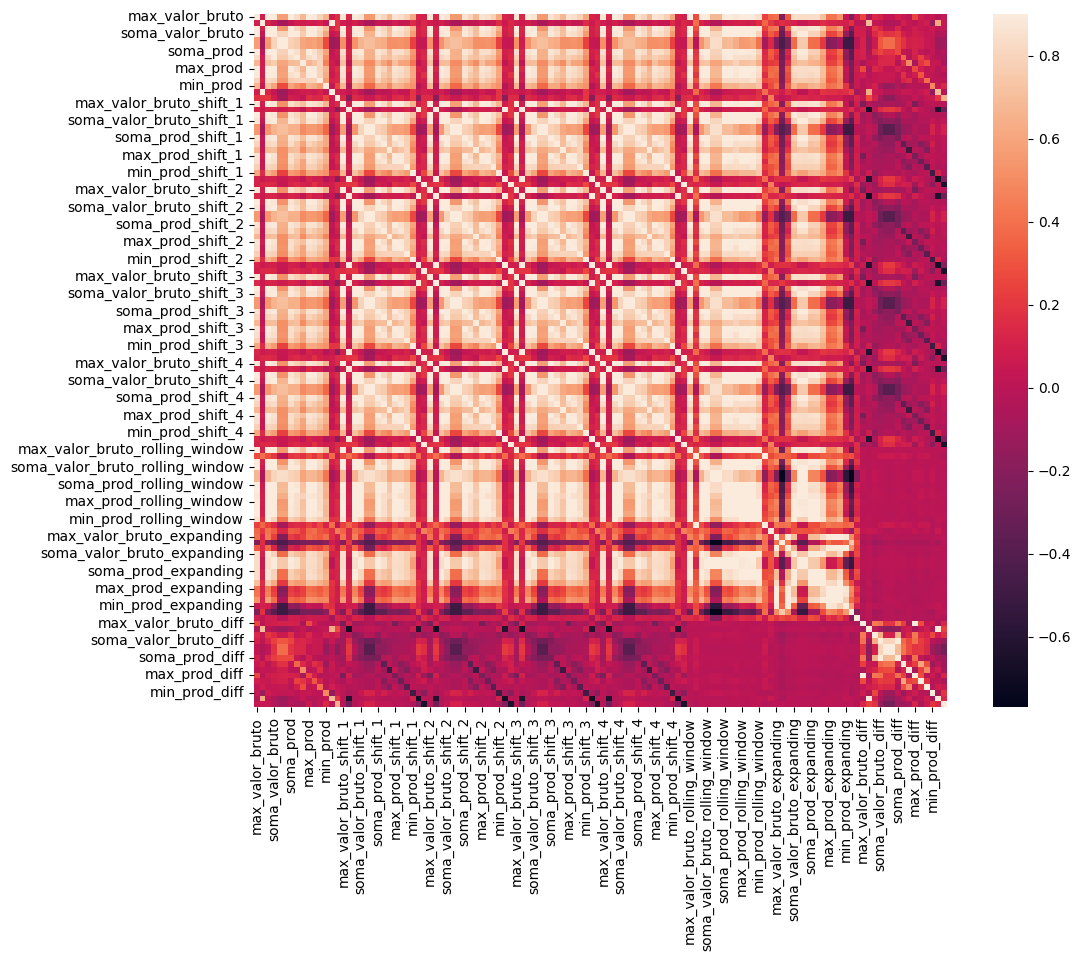

In [188]:
# análise de correlação entre as variáveis criadas
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True)

In [170]:
# código para transformação de fourier, estudandi
# from scipy.fft import fft, ifft


# time_series = base_final['soma_valor_bruto'].to_numpy()

# # transformação de fourier
# fft_values = fft(time_series)

# magnitude e frequência
# fft_magnitude = np.abs(fft_values)
# frequencies = np.fft.fftfreq(len(time_series))

# # spectrum de frequência
# plt.plot(frequencies, fft_magnitude)
# plt.xlabel('Frequency')
# plt.ylabel('Magnitude')
# plt.title('Frequency Spectrum')
# plt.show()

# # filtrar frequências de baixa magnitude
# threshold = 7
# fft_values_filtered = fft_values.copy()
# # fft_values_filtered[fft_magnitude < threshold] = 0

# # realizar o 'Inverse Fast Fourier Transform' (IFFT)
# filtered_time_series = ifft(fft_values_filtered)

# # plotar os gráficos juntos
# plt.plot(time_series, label='Original')
# plt.plot(filtered_time_series.real, label='Filtered')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Time Series Forecasting')
# plt.legend()
# plt.show()



In [176]:
from pmdarima import auto_arima

In [181]:
# realizando um modelo auto arima com base no valor
model_fit_valor = auto_arima(base_final['soma_valor_bruto'],
                       m=12,
                       d=0,
                       D=0,
                       max_order=None,                       
                       max_p=7,
                       max_q=7,
                       max_d=2,
                       max_P=4,
                       max_Q=4,
                       max_D=2,
                       maxiter = 50,
                       alpha = 0.05,
                       n_jobs = -1,
                       seasonal=True,
                       trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True
                      )

model_fit_valor.summary()

/opt/homebrew/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=5.70 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=6626.245, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=6281.611, Time=0.68 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=6492.907, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=6932.513, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=6280.293, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=6281.681, Time=0.31 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=6283.583, Time=0.91 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=6259.871, Time=0.06 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=6261.871, Time=0.49 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=6261.871, Time=0.57 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=6263.862, Time=1.89 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=6232.126, Time=0.13 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=6234.025, Time=2.73 sec
 ARIMA(3,0,0)(0,0,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:               SARIMAX(4, 0, 1)   Log Likelihood               -3097.646
Date:                Wed, 15 May 2024   AIC                           6207.293
Time:                        15:41:03   BIC                           6227.347
Sample:                             0   HQIC                          6215.400
                                - 209                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8817      0.119      7.439      0.000       0.649       1.114
ar.L2         -0.1765      0.093     -1.894      0.058      -0.359       0.006
ar.L3          0.1658      0.086      1.929      0.054      -0.003       0.334
ar.L4          0.1280      0.085      1.515      0.130      -0.038       0.294
ma.L1         -0.5732      0.120     -4.772      0.000      -0.809      -0.338
sigma2      4.465e+11   4.43e-14   1.01e+25      0.000    4.47e+11    4.47e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                67.71
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               5.08   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+42. Standard errors may be unstable.
"""

In [190]:
# melhor modelo
model_fit_valor

ARIMA(order=(4, 0, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [192]:
# predições para os próximos 2 anos
model_fit_valor.predict(n_periods=104, return_conf_int=True) 

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(209    6.625280e+06
 210    6.970241e+06
 211    7.024498e+06
 212    6.859956e+06
 213    6.812125e+06
            ...     
 308    6.445130e+06
 309    6.440837e+06
 310    6.436547e+06
 311    6.432261e+06
 312    6.427977e+06
 Length: 104, dtype: float64,
 array([[ 5315604.56175363,  7934956.40268102],
        [ 5599668.98434308,  8340812.7271009 ],
        [ 5648236.87494241,  8400759.52175128],
        [ 5460074.88605485,  8259838.00368615],
        [ 5345222.27935314,  8279027.57462662],
        [ 5328023.74858075,  8376273.80999281],
        [ 5312670.26942814,  8438412.55619153],
        [ 5261241.99734565,  8458976.098925  ],
        [ 5203751.55448178,  8482023.66075906],
        [ 5159245.71081196,  8519613.7920575 ],
        [ 5121135.75230733,  8558576.71052638],
        [ 5080607.7694536 ,  8591415.70249274],
        [ 5038172.83963042,  8621365.48298337],
        [ 4997136.62221766,  8652007.28227764],
        [ 4957989.31359166,  8683028.13151926],
        [ 4919558.5

In [180]:
# realizando um modelo auto arima com base na quantidade
model_fit_count = auto_arima(base_final['count_id'],
                       m=12,
                       d=0,
                       D=0,
                       max_order=None,                       
                       max_p=7,
                       max_q=7,
                       max_d=2,
                       max_P=4,
                       max_Q=4,
                       max_D=2,
                       maxiter = 50,
                       alpha = 0.05,
                       n_jobs = -1,
                       seasonal=True,
                       trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True
                      )

model_fit_count.summary()

/opt/homebrew/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=21.69 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1793.822, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1647.467, Time=2.90 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1683.572, Time=4.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2389.260, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1652.131, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1644.381, Time=11.09 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=1645.241, Time=11.62 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1644.759, Time=11.81 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1643.268, Time=6.15 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1649.362, Time=2.29 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1644.661, Time=8.07 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1647.588, Time=3.14 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=1647.065, Time=13.25 sec
 ARIMA(0,0,0)(1,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:               SARIMAX(4, 0, 1)   Log Likelihood                -791.763
Date:                Wed, 15 May 2024   AIC                           1597.527
Time:                        15:40:16   BIC                           1620.923
Sample:                             0   HQIC                          1606.986
                                - 209                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6680      0.928      0.720      0.471      -1.150       2.486
ar.L1          1.0757      0.086     12.480      0.000       0.907       1.245
ar.L2         -0.2906      0.113     -2.577      0.010      -0.512      -0.070
ar.L3          0.0754      0.131      0.573      0.566      -0.182       0.333
ar.L4          0.1303      0.090      1.441      0.149      -0.047       0.308
ma.L1         -0.7738      0.076    -10.145      0.000      -0.923      -0.624
sigma2       113.2221      7.744     14.620      0.000      98.043     128.401
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                94.55
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.13   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [191]:
# predições para os próximos 2 anos
model_fit_count.predict(n_periods=104, return_conf_int=True) 

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(209    89.051684
 210    88.015904
 211    90.834039
 212    91.893713
 213    91.361248
          ...    
 308    81.643572
 309    81.577131
 310    81.511177
 311    81.445706
 312    81.380714
 Length: 104, dtype: float64,
 array([[ 68.19651854, 109.90684998],
        [ 66.23068491, 109.80112226],
        [ 69.03715185, 112.63092604],
        [ 70.09090019, 113.69652658],
        [ 69.27415022, 113.44834504],
        [ 68.01162745, 113.10400225],
        [ 67.40167712, 113.1892074 ],
        [ 67.21546499, 113.47393561],
        [ 66.9961284 , 113.6918806 ],
        [ 66.61577451, 113.79312755],
        [ 66.18352667, 113.86456065],
        [ 65.79373706, 113.9600608 ],
        [ 65.44777632, 114.07309573],
        [ 65.11153079, 114.1807383 ],
        [ 64.7694303 , 114.27541451],
        [ 64.42682411, 114.36238773],
        [ 64.09157433, 114.44696812],
        [ 63.76501783, 114.52972576],
        [ 63.44472292, 114.60909846],
        [ 63.12898736, 114.68431359],
        [ 62

In [185]:
# features = [c for c in base_final.columns if c not in ['soma_valor_bruto', 'count_id']]
# target = base_final['soma_valor_bruto']
# # target = base_final['count_id']

In [183]:
# param = {
#     'bagging_freq': 5,
#     'bagging_fraction': 0.4,
#     'boost_from_average':'false',
#     'boost': 'gbdt',
#     'feature_fraction': 0.05,
#     'learning_rate': 0.01,
#     'max_depth': -1,  
#     'metric':'auc',
#     'min_data_in_leaf': 80,
#     'min_sum_hessian_in_leaf': 10.0,
#     'num_leaves': 13,
#     'num_threads': 8,
#     'tree_learner': 'serial',
#     'objective': 'binary', 
#     'verbosity': 1
# }

In [187]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import roc_auc_score, roc_curve

# folds = StratifiedKFold(n_splits=10, shuffle=False)
# oof = np.zeros(len(base_final))
# predictions = np.zeros(len(base_final))
# feature_importance_df = pd.DataFrame()

# for fold_, (trn_idx, val_idx) in enumerate(folds.split(base_final.values, target.values)):
#     print("Fold {}".format(fold_))
#     trn_data = lgb.Dataset(base_final.iloc[trn_idx][features], label=target.iloc[trn_idx])
#     val_data = lgb.Dataset(base_final.iloc[val_idx][features], label=target.iloc[val_idx])

#     num_round = 1000000
#     clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
#     oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
#     fold_importance_df = pd.DataFrame()
#     fold_importance_df["Feature"] = features
#     fold_importance_df["importance"] = clf.feature_importance()
#     fold_importance_df["fold"] = fold_ + 1
#     feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
#     predictions += clf.predict(base_final[features], num_iteration=clf.best_iteration) / folds.n_splits

# print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [ ]:
# from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
# from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
# from sklearn.model_selection import KFold, cross_val_score, train_test_split
# from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import lightgbm as lgb



In [ ]:
# train = all_data[:ntrain]
# test = all_data[ntrain:]

In [ ]:
# n_folds = 5

# def rmsle_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
#     rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
#     return(rmse)

In [ ]:
# ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)

In [ ]:
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)